In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from ast import literal_eval
import lightgbm as lgbm
import xgboost as xgb

#import ring

# 1. DataSet

## 1a. identify Dataset  
  
  * https://urldefense.proofpoint.com/v2/url?u=https-3A__www.kaggle.com_rounakbanik_the-2Dstory-2Dof-2Dfilm_notebook-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=RIGCiPYqZDKfGmeTeUwO6DFND7A4d2zCGZX9-7Zdy1g&e=   * IMDb stands for Internet Movie Database.
  * "The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the MovieLens Latest Full Dataset comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us."
  * Data generation for IMDb: "registered and logged-in users can submit new material and suggest edits to existing entries. Most of the site's data has been provided by these volunteers" from https://urldefense.proofpoint.com/v2/url?u=https-3A__en.wikipedia.org_wiki_IMDb-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=zR6l9MCXiBCM6jc2IHJu91Pz4SiEIeifBzovw4hOXDM&e=   * Website operation: indepednently (1990-1998) to Amazon.com subsidiary (1998–present)
  * The website included ___ user and  ___ movies as of Dec 202 according to the public statsitic on the website: [Press Room Statistic](https://urldefense.proofpoint.com/v2/url?u=https-3A__www.imdb.com_pressroom_stats_-29-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=vMt4r8Mb4j5A1rs77VdlYYxskUlaHjgH1JjEzIYxp1Q&e=   * The volunteered edition, update behavior follows the community policies and major changes requires approaval from the website. Also refers to the [Constributor's Charter](https://urldefense.proofpoint.com/v2/url?u=https-3A__contribute.imdb.com_charter&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=3_oSml8Z_zeZWUFyGnhsEgP2L14-H8zyoxha0VW8S3A&e= ) from IMDb website.
  
  
 


In [2]:
movies = pd.read_csv('movies_metadata.csv')

C:\Users\wanga\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

****

↓

## 1b Basic Data Cleaning. Drop Rows and Columns with justification

## Basic Statistics

### Range of data
* The dataset covers 45436 moviews released between 1874 to 2020
* record include a total of 5 million votes
* Data covers the basic production information about a movie (eg production compony, budget). Infomation about the releasing movie (eg. title, overview, genres, runtime langauges). And data based on the reflection of general public and ImDb registered users (eg. revenue, popularity, vote_average, vote_count).
* Overall, our project lean towards using production adn releasing information to predict the reflection of audiences. 


In [5]:
data = pd.read_csv('movies_metadata.csv')

In [6]:
data.id.nunique()

45436

In [7]:
year =data.release_date.str.extract("^(.{4})-")[0].astype(float)
year

0        1995.0
1        1995.0
2        1995.0
3        1995.0
4        1995.0
          ...  
45461       NaN
45462    2011.0
45463    2003.0
45464    1917.0
45465    2017.0
Name: 0, Length: 45466, dtype: float64

ealiest released: 1874.0
latest released: 2020.0


<AxesSubplot:>

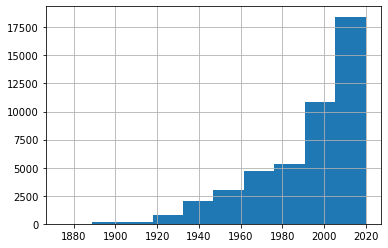

In [8]:
#year distribution
print('ealiest released: ' + str(year.min()))
print('latest released: ' + str(year.max()))
display(year.hist())

In [9]:
#total votes
data.vote_count.sum()

4995933.0

In [10]:
# All columns
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Data Cleaning


**Drop Columns 1** : 
* Columns that include the website generated movie identifier will be removed since 1. identifier will nt be used to discover features about the data and should not be used in building model adn 2. They are specific to the data generated from IMDb and not generalizable to other dataset about movies.
* EDA, feature engineering and modal building will mainly based on textual and quantitative data, therefore, columns containing links to images (posters), websites etc will not be included so on.

#### Row Drops
Some rows containing data that are off place. Probably due the data generating process or when data is ocverted to pd table from JSON. Since we can't verify how muc these datas are off the place, choose to directly drop the columns.  
The following cell shows a example of off-place row and its surrounding rows. Examples shows that one data won't affect the surrounding rows. It is fine to drop directly

In [11]:
#checking process
#example offset row (showing in transpose df)
data.adult.value_counts()
data.iloc[29500:29505].T#[data.adult.str.contains('Rune')]

,29500,29501,29502,29503,29504
adult,False,False,False,Rune Balot goes to a casino connected to the ...,False
belongs_to_collection,NaN,"{'id': 122661, 'name': 'Mardock Scramble Colle...","{'id': 122661, 'name': 'Mardock Scramble Colle...",1.931659,NaN
budget,10000000,0,0,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,0
genres,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 53, 'name': 'Thriller'}, {'id': 16, 'n...","[{'id': 16, 'name': 'Animation'}, {'id': 878, ...","[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'id': 10770, 'name': 'TV Movie'}, {'id': 35,..."
homepage,https://twitter.com/50to1_Movie,http://m-scramble.jp/compression/,http://m-scramble.jp/exhaust/,"[{'iso_3166_1': 'US', 'name': 'United States o...",NaN
id,197583,73529,122662,2012-09-29,50794
imdb_id,tt1777595,tt1754177,tt2423504,0,tt0327698
original_language,en,ja,ja,68.0,en
original_title,50 to 1,マルドゥック・スクランブル 圧縮,マルドゥック・スクランブル 排気,"[{'iso_639_1': 'ja', 'name': '日本語'}]",The Even Stevens Movie
overview,A misfit group of New Mexico cowboys find them...,Rune Ballot is a down-and-out teen prostitute ...,Third film of the Mardock Scramble series.,Released,The Stevens think that they've won an all-expe...


In [12]:
19730
29503
35587

35587

In [13]:
cleaned_data_1 = (
    data
    .drop([19730,29503,35587])
    .drop(columns=['homepage','imdb_id','id','poster_path'])
)
cleaned_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   original_language      45452 non-null  object 
 5   original_title         45463 non-null  object 
 6   overview               44509 non-null  object 
 7   popularity             45460 non-null  object 
 8   production_companies   45460 non-null  object 
 9   production_countries   45460 non-null  object 
 10  release_date           45376 non-null  object 
 11  revenue                45460 non-null  float64
 12  runtime                45203 non-null  float64
 13  spoken_languages       45460 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

In [14]:
cleaned_data_1.overview#.original_language.value_counts()[30:]#.plot(kind='bar')

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45463, dtype: object

In [15]:
cleaned_data_1.popularity.astype(float)

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45463, dtype: float64

**Column Drop 2**
After basic cleaning, following columns will be dropped
* `adult`: The adult column is very imbalanced. This may shows the bias in the dataset. The dataset may mainly include films that are not limited to adult only. Provide the limitation in the future generalization of the model.Consider different country may have different way to classfiy adult movie and some country don't even have equivlent category. And also data itself is very imbalanced --> discard from feature 
* `status`: Similarly, 99% movies are classified as Released and other categories together only takes 1 % of the movies


In [16]:
#table after second drop
cleaned_data_1_2 = cleaned_data_1.drop(columns=['adult', 'status', 'original_title','tagline'])
cleaned_data_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45463 non-null  object 
 2   genres                 45463 non-null  object 
 3   original_language      45452 non-null  object 
 4   overview               44509 non-null  object 
 5   popularity             45460 non-null  object 
 6   production_companies   45460 non-null  object 
 7   production_countries   45460 non-null  object 
 8   release_date           45376 non-null  object 
 9   revenue                45460 non-null  float64
 10  runtime                45203 non-null  float64
 11  spoken_languages       45460 non-null  object 
 12  title                  45460 non-null  object 
 13  video                  45460 non-null  object 
 14  vote_average           45460 non-null  float64
 15  vo

In [17]:
#status
cleaned_data_1.status.value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

(array([0.15022422, 0.01793722, 0.01121076, 0.04484305, 0.10089686,
        0.19282511, 0.2735426 , 0.12556054, 0.05829596, 0.02466368]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

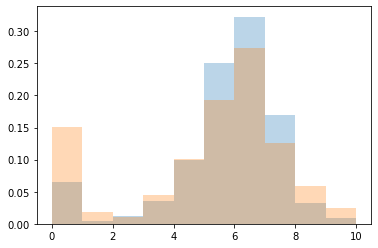

In [19]:
#compare distribution of average rating in released and other status
import matplotlib.pyplot as plt
plt.hist(cleaned_data_1[cleaned_data_1.status=='Released'].vote_average, density=True, alpha=0.3)
plt.hist(cleaned_data_1[cleaned_data_1.status!='Released'].vote_average, density=True, alpha=0.3)

In [20]:
# original title
cleaned_data_1.original_title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                        رگ خواب
45462            Siglo ng Pagluluwal
45463                       Betrayal
45464            Satana likuyushchiy
45465                       Queerama
Name: original_title, Length: 45463, dtype: object

### Special Format Cleaning (use cleaned_data_1_2 since this step)
Columns `belongs_to_collection`, `genres`, `production_companies`, `production_countries` and `spoken_languages` contains values as string for list of dictionary. 
1. These data should generally exist as list. 
2. the id and abbreviation in these data may be specific to the website and not applicable else where.   

Therefore, extract teh actual names of the categories in these values and organize them into simply list  
Example Format of values "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"


In [21]:
def clean_list_dic(x):
    #if nan return empty string / empty list?
    if type(x)==float:
        return []
    return re.findall("'name': '(.*?)'", x)

def count_len(x):
    #take in list return count
    return len(x)

In [22]:
#Generate clean list
belongs_to_collection=cleaned_data_1_2.belongs_to_collection
belongs_to_collection_clean = belongs_to_collection.apply(clean_list_dic)
genres_clean = cleaned_data_1_2.genres.apply(clean_list_dic)
production_companies_clean=cleaned_data_1_2.production_companies.apply(clean_list_dic)
production_countries_clean = cleaned_data_1_2.production_countries.apply(clean_list_dic)
spoken_languages_clean = cleaned_data_1_2.spoken_languages.apply(clean_list_dic)

# Assign to table
cleaned_data_2 = cleaned_data_1_2.assign(
    belongs_to_collection=belongs_to_collection_clean,
    genres=genres_clean,
    production_companies=production_companies_clean,
    production_countries=production_countries_clean,
    spoken_languages=spoken_languages_clean
    )
#sample
cleaned_data_2.head().T

,0,1,2,3,4
belongs_to_collection,[Toy Story Collection],[],[Grumpy Old Men Collection],[],[Father of the Bride Collection]
budget,30000000,65000000,0,16000000,0
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]"
production_countries,[United States of America],[United States of America],[United States of America],[United States of America],[United States of America]
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10
revenue,373554033.0,262797249.0,0.0,81452156.0,76578911.0


## <span style='color:Red'> Cleaned Data  </span>
df: cleaned_data_3 (generated from cleaned_data_2): to general data type + count of listin columns
For baseline
df: baseline_features

In [24]:
# new columns value
cleaned_data_3=cleaned_data_2.copy()
genres_count=cleaned_data_2.genres.apply(count_len)
belongs_to_collection_boolean =cleaned_data_2.belongs_to_collection.apply(count_len)==0

#-------- #Baseline features ------
revenue_fillna=cleaned_data_2.revenue.fillna(0)
popularity_fillna=cleaned_data_2.popularity.fillna(0)
vote_average_fillna = cleaned_data_2.vote_average.fillna(0)
production_companies_count=cleaned_data_2.production_companies.apply(count_len)
runtime_fillna=cleaned_data_2.runtime.fillna(cleaned_data_2.runtime.mean())
spoken_languages_count=cleaned_data_2.spoken_languages.apply(count_len)
# Vote count
vote_count=cleaned_data_2.vote_count.fillna(0).astype(int)
vote_count_log=vote_count.apply(lambda x: np.log(x+1)).fillna(0)
### Angela: add revenue_log
revenue=cleaned_data_2.revenue.fillna(0).astype(int)
revenue_log=revenue.apply(lambda x: np.log(x+1)).fillna(0)
### Angela: add production_countries for splitting the data
production_countries = cleaned_data_2.production_countries

baseline_features_raw = pd.DataFrame([
    revenue_fillna.values, popularity_fillna.values, production_companies_count.values, 
    runtime_fillna.values,
    spoken_languages_count.values,
    vote_count.values,vote_count_log.values, 
    revenue_log.values, vote_average_fillna.values,
    production_countries.values]).T


baseline_features=baseline_features_raw.rename(
    columns={0:'revenue',1:'popularity',2:'production_companies_count',3:'runtime',
            4:'spoken_languages_count',5:'vote_count',
             6:'vote_count_log', 7:'revenue_log', 8:'vote_average', 
             9:'production_countries'})
baseline_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   revenue                     45463 non-null  object
 1   popularity                  45463 non-null  object
 2   production_companies_count  45463 non-null  object
 3   runtime                     45463 non-null  object
 4   spoken_languages_count      45463 non-null  object
 5   vote_count                  45463 non-null  object
 6   vote_count_log              45463 non-null  object
 7   revenue_log                 45463 non-null  object
 8   vote_average                45463 non-null  object
 9   production_countries        45463 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


In [25]:
cleaned_data_3=cleaned_data_2.assign(
    genres_count=genres_count,
    belongs_to_collection=belongs_to_collection_boolean,
    revenue=revenue_fillna,
    popularity=popularity_fillna,
    production_companies_count=production_companies_count,
    runtime=runtime_fillna,
    spoken_languages_count=spoken_languages_count,
    vote_count=vote_count,
    vote_count_log=vote_count_log
    )
cleaned_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45463 non-null  object 
 1   budget                 45463 non-null  object 
 2   genres                 45463 non-null  object 
 3   original_language      45452 non-null  object 
 4   overview               44509 non-null  object 
 5   popularity             45460 non-null  object 
 6   production_companies   45463 non-null  object 
 7   production_countries   45463 non-null  object 
 8   release_date           45376 non-null  object 
 9   revenue                45460 non-null  float64
 10  runtime                45203 non-null  float64
 11  spoken_languages       45463 non-null  object 
 12  title                  45460 non-null  object 
 13  video                  45460 non-null  object 
 14  vote_average           45460 non-null  float64
 15  vo

## Split to US and non-US data (both 'baseline_features' and 'cleaned_data_3')

In [26]:
### Split baseline dataset
baseline_features['only_produced_by_US'] = baseline_features['production_countries']\
.apply(lambda x: (len(x) == 1) and (x[0] == 'United States of America'))
baseline_us = baseline_features[baseline_features['only_produced_by_US'] == True]
baseline_other = baseline_features[baseline_features['only_produced_by_US'] == False]
baseline_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17851 entries, 0 to 45460
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   revenue                     17851 non-null  object
 1   popularity                  17851 non-null  object
 2   production_companies_count  17851 non-null  object
 3   runtime                     17851 non-null  object
 4   spoken_languages_count      17851 non-null  object
 5   vote_count                  17851 non-null  object
 6   vote_count_log              17851 non-null  object
 7   revenue_log                 17851 non-null  object
 8   vote_average                17851 non-null  object
 9   production_countries        17851 non-null  object
 10  only_produced_by_US         17851 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 1.5+ MB


In [27]:
### Split cleaned_data_3
cleaned_data_3['only_produced_by_US'] = cleaned_data_3['production_countries']\
.apply(lambda x: (len(x) == 1) and (x[0] == 'United States of America'))
cleaned_3_us = cleaned_data_3[cleaned_data_3['only_produced_by_US'] == True]
cleaned_3_other = cleaned_data_3[cleaned_data_3['only_produced_by_US'] == False]
cleaned_3_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17851 entries, 0 to 45463
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       17851 non-null  bool   
 1   budget                      17851 non-null  object 
 2   genres                      17851 non-null  object 
 3   original_language           17848 non-null  object 
 4   overview                    17822 non-null  object 
 5   popularity                  17851 non-null  object 
 6   production_companies        17851 non-null  object 
 7   production_countries        17851 non-null  object 
 8   release_date                17846 non-null  object 
 9   revenue                     17851 non-null  float64
 10  runtime                     17851 non-null  float64
 11  spoken_languages            17851 non-null  object 
 12  title                       17851 non-null  object 
 13  video                       178

## Train 4 models on the baseline data

### Decide metrics: RMSE, one of the most common ones, calculate validation RMSE

In [102]:
# Custom function for printing test rmse, column_to_drop: dropping unnecessary training_x data if not just vote_average
def get_rmse(n_iteration, model, df, column_to_drop = ['vote_average']):
    rmse_list = []
    for _ in range(n_iteration):
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = column_to_drop), 
                                                            df['vote_average'], test_size=0.25)
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        rmse = mean_squared_error(y_test, predicted, squared=False)
        rmse_list.append(rmse)
    print(rmse_list)
    print(np.mean(rmse_list))

In [103]:
# Change the columns to int or float
for col_name in baseline_us.columns[:-2]:
    if ('count' not in col_name) | ('log' in col_name):
        baseline_us[col_name] = baseline_us[col_name].astype('float')
    else:
        baseline_us[col_name] = baseline_us[col_name].astype('int')
baseline_us = baseline_us.drop(columns = ['production_countries', 'only_produced_by_US'])
baseline_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17851 entries, 0 to 45460
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     17851 non-null  float64
 1   popularity                  17851 non-null  float64
 2   production_companies_count  17851 non-null  int32  
 3   runtime                     17851 non-null  float64
 4   spoken_languages_count      17851 non-null  int32  
 5   vote_count                  17851 non-null  int32  
 6   vote_count_log              17851 non-null  float64
 7   revenue_log                 17851 non-null  float64
 8   vote_average                17851 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.2 MB


C:\Users\wanga\AppData\Local\Temp/ipykernel_20396/4140288815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_us[col_name] = baseline_us[col_name].astype('float')
C:\Users\wanga\AppData\Local\Temp/ipykernel_20396/4140288815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_us[col_name] = baseline_us[col_name].astype('int')


In [104]:
# Change the columns to int or float
for col_name in baseline_other.columns[:-2]:
    if ('count' not in col_name) | ('log' in col_name):
        baseline_other[col_name] = baseline_other[col_name].astype('float')
    else:
        baseline_other[col_name] = baseline_other[col_name].astype('int')
baseline_other = baseline_other.drop(columns = ['production_countries', 'only_produced_by_US'])
baseline_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27612 entries, 6 to 45462
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     27612 non-null  float64
 1   popularity                  27612 non-null  float64
 2   production_companies_count  27612 non-null  int32  
 3   runtime                     27612 non-null  float64
 4   spoken_languages_count      27612 non-null  int32  
 5   vote_count                  27612 non-null  int32  
 6   vote_count_log              27612 non-null  float64
 7   revenue_log                 27612 non-null  float64
 8   vote_average                27612 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.8 MB


C:\Users\wanga\AppData\Local\Temp/ipykernel_20396/1024592939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_other[col_name] = baseline_other[col_name].astype('float')
C:\Users\wanga\AppData\Local\Temp/ipykernel_20396/1024592939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_other[col_name] = baseline_other[col_name].astype('int')


### Linear model

In [30]:
# US
regr = linear_model.LinearRegression()
get_rmse(10, regr, baseline_us)

[1.541024464559333, 1.553730218143317, 1.5637766350385909, 1.546356482965163, 1.5815493618087935, 1.5612585894699256, 1.5261871779271245, 1.5862010337991428, 1.5566510501192927, 1.566047914080957]
1.558278292791164


In [31]:
# Other
regr = linear_model.LinearRegression()
get_rmse(10, regr, baseline_other)

[1.7638343741587574, 1.7554524387867902, 1.7633678678226943, 1.7446382899178552, 1.726473703231189, 1.7597952652538924, 1.760115996951715, 1.766974469266893, 1.7820908334791028, 1.7494655732355304]
1.7572208812104417


### DecisionTreeRegressor

In [38]:
# US
dtr = DecisionTreeRegressor()
get_rmse(10, dtr, baseline_us)

[1.6744411249390931, 1.6263500743058021, 1.6687080634254368, 1.6652368203761188, 1.6614670553939777, 1.627376147576276, 1.6366379905668522, 1.6116050676321036, 1.6497428149837203, 1.65549485985627]
1.647706001905565


In [40]:
# Other
dtr = DecisionTreeRegressor()
get_rmse(10, dtr, baseline_other)

[1.7033928359047306, 1.6917979227739481, 1.7064406630019446, 1.7209184150392511, 1.705608510512975, 1.7105377653292, 1.7115050691197158, 1.7580365333396402, 1.70883804990568, 1.7403199713792286]
1.7157395736306313


### RandomForestRegressor

In [95]:
# US
rfr = RandomForestRegressor()
get_rmse(10, rfr, baseline_us)

[1.2069795973319235, 1.2455749142085628, 1.2312447281313323, 1.2215050538003438, 1.2016265134558315, 1.2150098656226562, 1.208850599774224, 1.196736317481136, 1.2189903507579005, 1.2014174187294104]
1.214793535929332


In [96]:
# Other
rfr = RandomForestRegressor()
get_rmse(10, rfr, baseline_other)

[1.2756629675229385, 1.2322681339332437, 1.259074346255091, 1.2578864338608942, 1.2596519932181756, 1.2451530635316566, 1.262157195477449, 1.2725780841291698, 1.2442210890606022, 1.2678601016089746]
1.2576513408598196


## XGBRegressor

In [97]:
# US
xg_reg = xgb.XGBRegressor()
get_rmse(5, xg_reg, baseline_us)

[1.1968252480544685, 1.170491356708426, 1.222866317875089, 1.161083758868381, 1.2043523971298395]
1.1911238157272408


In [98]:
# Other
xg_reg = xgb.XGBRegressor()
get_rmse(5, xg_reg, baseline_other)

[1.2215358567337218, 1.2042433800026706, 1.2163568725164202, 1.2337417575545122, 1.2189887667070374]
1.2189733267028724


## LightGBM (Discarded, too slow)

In [102]:
# Use n_jobs = -1 to parallize the processing process
lgbmR = lgbm.LGBMRegressor(n_jobs = -1, n_estimators = 100, max_depth = 50)
get_rmse(1, lgbmR, baseline_us)

[1.1550653162853919]
1.1550653162853919


In [37]:
# Use n_jobs = -1 to parallize the processing process
# lgbmR = lgbm.LGBMRegressor(n_jobs = -1, n_estimators = 100, max_depth = 50)
# get_rmse(1, lgbmR, baseline_other)

## Picking RandomForest and XGBRegressor to tune

### RandomForest

In [44]:
## Prevent overfit for RandomForest (tune the n_estimators and max_depth)
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100, 200, 300], 'max_depth':[10, 20, 30, 50]}
rfr = RandomForestRegressor()
gsc = GridSearchCV(rfr, parameters)
gsc.fit(baseline_us.drop(columns = ['vote_average']), baseline_us.vote_average)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 50],
                         'n_estimators': [50, 100, 200, 300]})

In [46]:
gsc.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [47]:
## Prevent overfit for RandomForest (tune the n_estimators and max_depth): set more estimator, less max_depth
parameters = {'n_estimators':[300, 400, 500], 'max_depth':[3, 5, 8, 10]}
rfr = RandomForestRegressor()
gsc = GridSearchCV(rfr, parameters)
gsc.fit(baseline_us.drop(columns = ['vote_average']), baseline_us.vote_average)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'n_estimators': [300, 400, 500]})

In [49]:
gsc.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [50]:
## Prevent overfit for RandomForest (tune the n_estimators and max_depth): set more estimator, less max_depth
parameters = {'n_estimators':[500, 600, 700], 'max_depth':[10]}
rfr = RandomForestRegressor()
gsc = GridSearchCV(rfr, parameters)
gsc.fit(baseline_us.drop(columns = ['vote_average']), baseline_us.vote_average)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'n_estimators': [500, 600, 700]})

In [51]:
gsc.best_params_

{'max_depth': 10, 'n_estimators': 600}

In [52]:
# US
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, baseline_us)

[1.137877068609378, 1.1553332869243573, 1.130035808742907, 1.2207452095482498, 1.1398371594201289, 1.1431911726680304, 1.1669625306231837, 1.1276084839612475, 1.1605323561167546, 1.1616799249073788]
1.1543803001521613


In [53]:
# Other
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, baseline_other)

[1.2117937443538622, 1.1938918531122635, 1.2034367808544137, 1.1838250173214118, 1.1804500061984733, 1.19201761850368, 1.2003879873295473, 1.1964933844480907, 1.2152532943247587, 1.1945851890923656]
1.1972134875538867


### XGBRegressor

In [471]:
parameters = {'n_estimators':[50, 100], 'max_depth':[5, 8, 10], 'learning_rate':[0.08, 0.1]}
xg_reg = xgb.XGBRegressor(n_jobs = -1)
gsc = GridSearchCV(xg_reg, parameters, cv = 4)
gsc.fit(baseline_us.drop(columns = ['vote_average']), baseline_us.vote_average)
gsc.best_params_

{'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 100}

In [91]:
%%time
#### US data: best parameters so far ####
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, baseline_us)

[1.139744500311425, 1.1675527799878225, 1.18509835915806, 1.1566532099463511, 1.1713964834276585, 1.1926906422478687, 1.1521704467422342, 1.1962896569990797, 1.152733167708285, 1.135106397342113]
1.1649435643870898
Wall time: 7.48 s


In [93]:
%%time
# US data
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 100, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, baseline_us)

[1.16613344208697, 1.1464127052757203, 1.1492795851014364, 1.2003086457871748, 1.2053666447557994, 1.1692957865954576, 1.1922145583089678, 1.169596815174852, 1.1680732935209814, 1.1914940443337407]
1.1758175520941099
Wall time: 15 s


In [94]:
%%time
# US data
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 8, learning_rate = 0.1)
get_rmse(10, xg_reg, baseline_us)

[1.1830071745190587, 1.1497489175673623, 1.1800662519575347, 1.1614122576471513, 1.1890480258512413, 1.1562243796304716, 1.145430841117075, 1.169217032810208, 1.1758977081483601, 1.1594755998809356]
1.16695281891294
Wall time: 6.17 s


In [252]:
# Other Data
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, baseline_other)

[1.200275504085769, 1.207862747685557, 1.209851517511215, 1.2015554980437158, 1.239842214091827, 1.2055400168361625, 1.2109549760785427, 1.21120565861125, 1.2390429023674983, 1.2010616266873602]
1.2127192661998898


## Start of feature engineer!!

### Only use US data to test

##### 1. Belongs_to_collection (third one to talk about)

In [122]:
cleaned_3_us_reset = cleaned_3_us.reset_index(drop = True)
cleaned_features_us = cleaned_3_us_reset.copy()
cleaned_features_us

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,title,video,vote_average,vote_count,genres_count,production_companies_count,spoken_languages_count,vote_count_log,only_produced_by_US
0,False,30000000,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,[English],Toy Story,False,7.7,5415,3,1,1,8.597113,True
1,True,65000000,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,"[English, Français]",Jumanji,False,6.9,2413,3,3,2,7.789040,True
2,False,0,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,...,[English],Grumpier Old Men,False,6.5,92,2,2,1,4.532599,True
3,True,16000000,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,...,[English],Waiting to Exhale,False,6.1,34,3,1,1,3.555348,True
4,False,0,[Comedy],en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,...,[English],Father of the Bride Part II,False,5.7,173,1,2,1,5.159055,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,True,0,"[Comedy, Drama]",en,The Morning After is a feature film that consi...,0.139936,"[Oops Doughnuts Productions, He and She Films]",[United States of America],2015-01-11,0.0,...,[English],The Morning After,False,4.0,2,2,2,1,1.098612,True
17847,True,0,"[Horror, Mystery, Thriller]",en,An unsuccessful sculptor saves a madman named ...,0.222814,[Universal Pictures],[United States of America],1946-03-29,0.0,...,[English],House of Horrors,False,6.3,8,3,1,1,2.197225,True
17848,True,0,[Horror],en,A film archivist revisits the story of Rustin ...,0.38645,"[Neptune Salad Entertainment, Pirie Productions]",[United States of America],2000-10-03,0.0,...,[English],The Burkittsville 7,False,7.0,1,1,2,1,0.693147,True
17849,True,0,[Science Fiction],en,It's the year 3000 AD. The world's most danger...,0.661558,[Concorde-New Horizons],[United States of America],1995-01-01,0.0,...,[English],Caged Heat 3000,False,3.5,1,1,1,1,0.693147,True


In [126]:
baseline_us.info()
baseline_us_reset = baseline_us.reset_index(drop = True)
baseline_us_reset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17851 entries, 0 to 45460
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     17851 non-null  float64
 1   popularity                  17851 non-null  float64
 2   production_companies_count  17851 non-null  int32  
 3   runtime                     17851 non-null  float64
 4   spoken_languages_count      17851 non-null  int32  
 5   vote_count                  17851 non-null  int32  
 6   vote_count_log              17851 non-null  float64
 7   revenue_log                 17851 non-null  float64
 8   vote_average                17851 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.2 MB


,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7
...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5


In [127]:
belongs_to_collection = pd.concat([baseline_us_reset,cleaned_features_us[['belongs_to_collection']]], axis=1)
bool_average = belongs_to_collection['belongs_to_collection'].mean()
belongs_to_collection['belongs_to_collection'] = belongs_to_collection['belongs_to_collection']\
.fillna(bool_average)
belongs_to_collection

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,belongs_to_collection
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,False
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,True
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,False
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,True
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,False
...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,True
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,True
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,True
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,True


In [40]:
belongs_to_collection['belongs_to_collection'] = belongs_to_collection['belongs_to_collection']\
.apply(lambda x: 1 if (x == True) else 0)

In [95]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, belongs_to_collection)

[1.1393188345474918, 1.1356414195608069, 1.1132473104501273, 1.1730836717130357, 1.1631881242433062, 1.1416231096467908, 1.1394008515855878, 1.1397968968381498, 1.1410855497525112, 1.1330834707239454]
1.1419469239061752


- Not keep for RandomForestRegressor: RMSE around the same

In [54]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, belongs_to_collection)

[1.1472962527484467, 1.1819199129372053, 1.168023561793684, 1.1238860493128948, 1.1698556672672495, 1.1698741732083593, 1.1748593105319018, 1.1719477924941866, 1.1613971593661068, 1.1489260395306005]
1.1617985919190637


- Not keep: only 0.003 difference

***

##### 2. OneHotEncode genres (First to talk about)

In [114]:
from sklearn.preprocessing import MultiLabelBinarizer
def generate_all_categories(ser):
    # takes in series of list, generate all unique values
    all_value = ser.values.sum()
    all_cat=pd.Series(all_value)
    return all_cat.value_counts().sort_values(ascending= False) # all_value.value_counts() # the unique value counts

In [115]:
df_cleaned = cleaned_data_3
genres_types_counts= generate_all_categories(df_cleaned.genres)
production_companies_names_counts = generate_all_categories(df_cleaned.production_companies)
production_countries_names_counts = generate_all_categories(df_cleaned.production_countries)
spoken_languages_names_counts = generate_all_categories(df_cleaned.spoken_languages)

In [117]:
#generate list of existing classes
genres_types=genres_types_counts.index.to_list()
production_companies_names=production_companies_names_counts.index.to_list()
production_countries_names=production_countries_names_counts.index.to_list()
spoken_languages_names=spoken_languages_names_counts.index.to_list()
class_dict={'genres':genres_types,
            'production_companies':production_companies_names, 
            'production_countries':production_countries_names,
            'spoken_languages':spoken_languages_names}

In [119]:
def get_one_hot_df(df, column, top_popular_class_num=None, concat_df=False ):
    '''
    df: input feature table
    column: exact name of the columns need to be one_hot encoded {'genres','production_companies', 'production_countries','spoken_languages'}
    top_popular_class_num: the number of top most common categories to include in one hot, default
    concat_df: False: return ony the table of onehot encoding matrix. True: concat the one hot matrix to input df and return 
    '''
    #generate one hot coding matrix
    classes=class_dict[column]
    #take top _15_ most popular genres
    if top_popular_class_num==None:
        num_col=len(classes)
    else:
        num_col=top_popular_class_num
        
    mlb = MultiLabelBinarizer(classes=classes)
    feature_one_hot=mlb.fit_transform(df[column])

    #one-hot table
    one_hot_df=pd.DataFrame(data=feature_one_hot, columns=classes).iloc[:,:num_col]
    if concat_df==False:
        return one_hot_df
    else: 
        # concatinated to the orginal table
        example_one_hot_table=pd.concat([df,one_hot_df], axis=1 )
        return example_one_hot_table

In [123]:
cleaned_features_us.columns

Index(['belongs_to_collection', 'budget', 'genres', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'video', 'vote_average', 'vote_count',
       'genres_count', 'production_companies_count', 'spoken_languages_count',
       'vote_count_log', 'only_produced_by_US'],
      dtype='object')

In [124]:
#Only keep the OneHotEncode Column
df=cleaned_features_us
column='genres'
top_popular_class_num=20
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_genres=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_genres

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17847,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17848,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17849,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [128]:
genre_onehot = pd.concat([baseline_us_reset,one_hot_df_genres], axis=1)
genre_onehot

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,1,0,0,1,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,1,0,1,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,1,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, genre_onehot)

[1.0872015863679305, 1.0773644483276958, 1.0614406965204493, 1.0835859496065476, 1.0762331535569656, 1.0772392681558196, 1.073908337428996, 1.0824435214421282, 1.0784583538984334, 1.0844178635149335]
1.07822931788199


In [97]:
1.1543803001521613 - 1.07822931788199

0.07615098227017136

- Improved 0.075, include genres onehot

In [52]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, genre_onehot)

[1.0710386038808277, 1.0662081647879238, 1.1254633965122076, 1.0716776871310434, 1.0757568170983898, 1.0857236153595353, 1.0953243637694745, 1.0635667450476145, 1.097182514822998, 1.1016803347147917]
1.0853622243124805


In [98]:
1.1649435643870898 - 1.0853622243124805

0.07958134007460926

- Include: improved 0.08

#### 3. Production_companies (OneHot)  (second one to talk about)

In [129]:
#Only keep the OneHotEncode Column
df=cleaned_features_us
column='production_companies'
top_popular_class_num=29
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_companies=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_companies

,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17847,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
pro_companies_onehot = pd.concat([baseline_us_reset,one_hot_df_companies], axis=1)
pro_companies_onehot

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Warner Bros.,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,1,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,0,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,0,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, pro_companies_onehot)

[1.151162559861944, 1.1449945192097997, 1.1413505338380443, 1.133256804070104, 1.1490722492833796, 1.134694469216524, 1.1534152638711521, 1.16879628603472, 1.135004034249036, 1.1450340422453031]
1.1456780761880008


In [101]:
1.1543803001521613 - 1.1456780761880008

0.008702223964160538

In [100]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, pro_companies_onehot)

[1.16484969548934, 1.1337040173902917, 1.1788608267238687, 1.173238249721787, 1.1560082562013043, 1.1846492245369054, 1.1575732360877917, 1.1731069314487568, 1.1417152775401396, 1.159303448269025]
1.162300916340921


In [102]:
1.1649435643870898 - 1.162300916340921

0.0026426480461687607

#### 4. Production_countries (OneHot)

In [109]:
sum(production_countries_names_counts.values > 500)

13

In [131]:
#Only keep the OneHotEncode Column
df=cleaned_features_us
column='production_countries'
top_popular_class_num= 13
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_countries=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_countries

,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,1,0,0,0,0,0,0,0,0,0,0,0,0
17847,1,0,0,0,0,0,0,0,0,0,0,0,0
17848,1,0,0,0,0,0,0,0,0,0,0,0,0
17849,1,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
pro_countries_onehot = pd.concat([baseline_us_reset,one_hot_df_countries], axis=1)
pro_countries_onehot

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,United States of America,...,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,1,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,1,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,1,...,0,0,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,1,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, pro_countries_onehot)

[1.1685108386655516, 1.1422855823541473, 1.1397014193225898, 1.149917323240312, 1.1119942745803266, 1.1338229823043093, 1.1601576228842883, 1.1471474346725876, 1.1612546752788093, 1.1520259864287143]
1.1466818139731636


In [115]:
1.1543803001521613 - 1.1466818139731636

0.00769848617899771

In [114]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, pro_countries_onehot)

[1.1772488378574795, 1.139427061526786, 1.183220168968231, 1.1739392703801501, 1.1648825644017393, 1.1863728378488674, 1.1710288533713304, 1.1423098437400414, 1.1630991729359428, 1.170258927650559]
1.1671787538681129


In [116]:
1.1649435643870898 - 1.1671787538681129

-0.002235189481023081

#### 5. Release year

In [133]:
cleaned_features_us.release_date.head(5)

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [134]:
cleaned_features_us['release_date'] = cleaned_features_us['release_date'].fillna('0-0-0')

In [135]:
cleaned_features_us['release_year'] = cleaned_features_us['release_date'].apply(lambda x: int(x.split('-')[0]))

In [136]:
cleaned_features_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17851 entries, 0 to 17850
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       17851 non-null  bool   
 1   budget                      17851 non-null  object 
 2   genres                      17851 non-null  object 
 3   original_language           17848 non-null  object 
 4   overview                    17822 non-null  object 
 5   popularity                  17851 non-null  object 
 6   production_companies        17851 non-null  object 
 7   production_countries        17851 non-null  object 
 8   release_date                17851 non-null  object 
 9   revenue                     17851 non-null  float64
 10  runtime                     17851 non-null  float64
 11  spoken_languages            17851 non-null  object 
 12  title                       17851 non-null  object 
 13  video                       178

In [137]:
release_year = pd.concat([baseline_us_reset,cleaned_features_us[['release_year']]], axis=1)
release_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17851 entries, 0 to 17850
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     17851 non-null  float64
 1   popularity                  17851 non-null  float64
 2   production_companies_count  17851 non-null  int32  
 3   runtime                     17851 non-null  float64
 4   spoken_languages_count      17851 non-null  int32  
 5   vote_count                  17851 non-null  int32  
 6   vote_count_log              17851 non-null  float64
 7   revenue_log                 17851 non-null  float64
 8   vote_average                17851 non-null  float64
 9   release_year                17851 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 1.2 MB


In [138]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, release_year)

[1.1181496306032852, 1.122861265201546, 1.0755816445106303, 1.1256362813985923, 1.116400894376571, 1.1110245171485593, 1.0895168156211186, 1.099498625979222, 1.1044237928739626, 1.0904650986182838]
1.1053558566331771


In [144]:
1.1543803001521613 - 1.1053558566331771

0.04902444351898416

In [143]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, release_year)

[1.1239842206183206, 1.1074799999752418, 1.1165706490846035, 1.0883224423972413, 1.109039711081276, 1.1267788033191657, 1.1244074432104698, 1.1343826954698286, 1.1078391515889598, 1.1096845655547052]
1.1148489682299814


In [146]:
1.1649435643870898 - 1.1148489682299814

0.05009459615710843

#### 6. Production_countries (Count)

In [138]:
cleaned_features_us['production_countries'].apply(lambda x: len(x))

0        1
1        1
2        1
3        1
4        1
        ..
17846    1
17847    1
17848    1
17849    1
17850    1
Name: production_countries, Length: 17851, dtype: int64

#### 7. Release month

In [139]:
cleaned_features_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17851 entries, 0 to 17850
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       17851 non-null  bool   
 1   budget                      17851 non-null  object 
 2   genres                      17851 non-null  object 
 3   original_language           17848 non-null  object 
 4   overview                    17822 non-null  object 
 5   popularity                  17851 non-null  object 
 6   production_companies        17851 non-null  object 
 7   production_countries        17851 non-null  object 
 8   release_date                17851 non-null  object 
 9   revenue                     17851 non-null  float64
 10  runtime                     17851 non-null  float64
 11  spoken_languages            17851 non-null  object 
 12  title                       17851 non-null  object 
 13  video                       178

In [140]:
cleaned_features_us['release_month'] = cleaned_features_us['release_date'].apply(lambda x: int(x.split('-')[1]))

In [141]:
release_month = pd.concat([baseline_us_reset,cleaned_features_us[['release_month']]], axis=1)
release_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17851 entries, 0 to 17850
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue                     17851 non-null  float64
 1   popularity                  17851 non-null  float64
 2   production_companies_count  17851 non-null  int32  
 3   runtime                     17851 non-null  float64
 4   spoken_languages_count      17851 non-null  int32  
 5   vote_count                  17851 non-null  int32  
 6   vote_count_log              17851 non-null  float64
 7   revenue_log                 17851 non-null  float64
 8   vote_average                17851 non-null  float64
 9   release_month               17851 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 1.2 MB


In [160]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, release_month)

[1.1919382130094471, 1.1499736792421316, 1.1566268903613206, 1.1731385327741255, 1.1720129349039348, 1.1646383051601967, 1.1399180476875619, 1.1032726537442326, 1.1922722384238917, 1.1639235286454859]
1.1607715023952327


In [162]:
1.1543803001521613 - 1.1607715023952327

-0.006391202243071437

In [161]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, release_month)

[1.1661416181732631, 1.1627063265948656, 1.1909489706142216, 1.1743334980027136, 1.1686845118019258, 1.182078094181343, 1.171030779469861, 1.1736943835835874, 1.1504791022097582, 1.2008614109858744]
1.1740958695617414


In [163]:
1.1649435643870898 - 1.1740958695617414

-0.009152305174651598

#### 8. Spoken_languages (OneHot)

In [172]:
sum(spoken_languages_names_counts > 100)

32

In [142]:
#Only keep the OneHotEncode Column
df=cleaned_features_us
column='spoken_languages'
top_popular_class_num=32
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_lang=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_lang

,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,...,Türkçe,עִבְרִית,ελληνικά,ภาษาไทย,Norsk,فارسی,Latin,Română,தமிழ்,Srpski
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17847,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17849,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
spoken_lang_onehot = pd.concat([baseline_us_reset,one_hot_df_lang], axis=1)
spoken_lang_onehot

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,English,...,Türkçe,עִבְרִית,ελληνικά,ภาษาไทย,Norsk,فارسی,Latin,Română,தமிழ்,Srpski
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,1,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,1,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,1,...,0,0,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,1,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,1,...,0,0,0,0,0,0,0,0,0,0


In [175]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, spoken_lang_onehot)

[1.136275655175228, 1.16697877355175, 1.1388286668697536, 1.1562701119627492, 1.1400539045216767, 1.1284418795504298, 1.1486644529645849, 1.1062813439304742, 1.1383557245523528, 1.1471936029897063]
1.1407344116068705


In [177]:
1.1543803001521613 - 1.1407344116068705

0.013645888545290807

In [176]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, spoken_lang_onehot)

[1.1646082791349133, 1.161265499861079, 1.1622050234117796, 1.1743104132542392, 1.1495498778275648, 1.1198567507776516, 1.1674510644027336, 1.1705341795022197, 1.1863008041783054, 1.1805455662831879]
1.1636627458633675


In [186]:
1.1649435643870898 - 1.1636627458633675

0.0012808185237223046

### Feature combinations

#### 1. Genres + production_companies

In [144]:
genre__companies_onehot = pd.concat([genre_onehot,one_hot_df_companies], axis=1)
genre__companies_onehot

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, genre__companies_onehot)

[1.059878742353839, 1.0843930628318517, 1.0407074072880353, 1.0922519538607864, 1.066150876849358, 1.0360085276016988, 1.0607704802261027, 1.081623387011842, 1.057668716889743, 1.0600866953571448]
1.06395398502704


In [218]:
1.1543803001521613 - 1.06395398502704

0.09042631512512123

In [217]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, genre__companies_onehot)

[1.050019525842251, 1.0675151405037866, 1.0677248157008807, 1.080162847504418, 1.0810349058606574, 1.0338831207908616, 1.0565345042430787, 1.0625155444386745, 1.0844194582865518, 1.0714407926211185]
1.0655250655792279


In [219]:
1.1649435643870898 - 1.0655250655792279

0.09941849880786191

#### 2. Belongs_to_collections + release year

In [194]:
belongs_to_collection

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,belongs_to_collection
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,1
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0
...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,1
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,1
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,1


In [145]:
release_year_collection = pd.concat([belongs_to_collection,cleaned_features_us[['release_year']]], axis=1)
release_year_collection

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,belongs_to_collection,release_year
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,False,1995
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,True,1995
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,False,1995
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,True,1995
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,False,1995
...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,True,2015
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,True,1946
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,True,2000
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,True,1995


In [198]:
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, release_year_collection)

[1.097269802042525, 1.1228932269984608, 1.1091500192079107, 1.0889563936919906, 1.0997792414852814, 1.0869688282663574, 1.110619480847932, 1.134871299932289, 1.1028530060902066, 1.080413481677223]
1.1033774780240175


In [200]:
1.1543803001521613 - 1.1033774780240175

0.05100282212814378

In [199]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, release_year_collection)

[1.1125178962694744, 1.1020051708469696, 1.11289609891749, 1.122492800909923, 1.1083495277845188, 1.113240891585628, 1.0806265277322538, 1.1002438687113194, 1.0560950285208837, 1.1068360344840837]
1.1015303845762545


In [201]:
1.1649435643870898 - 1.1015303845762545

0.06341317981083527

#### 3. Genres + release year + release month

In [146]:
release_year_month_collection = pd.concat([genre_onehot,cleaned_features_us[['release_year', 'release_month']]], axis=1)
release_year_month_collection

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie,release_year,release_month
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,1,0,0,0,0,0,0,1995,10
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,1,0,0,0,0,0,0,0,1995,12
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,1995,12
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,1995,12
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,1995,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,2015,1
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,1946,3
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,2000,10
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,1995,1


In [205]:
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, release_year_month_collection)

[1.0228472644315423, 1.036037605959797, 1.0224879808710072, 0.9741198202370446, 1.0317790502359934, 1.0192760594537038, 1.0065782772685128, 1.0382330368325874, 1.0465405079537418, 1.0438587026663533]
1.0241758305910285


In [207]:
1.1543803001521613 - 1.0241758305910285

0.13020446956113285

In [206]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, release_year_month_collection)

[1.010723639276579, 1.007736378471618, 1.0288872940950142, 1.0306460151025039, 1.0068053233528163, 1.0055255905275033, 1.0254087909897478, 1.0253095014129057, 1.011703519964535, 1.007211266298719]
1.0159957319491941


In [208]:
1.1649435643870898 - 1.0159957319491941

0.14894783243789567

#### 4. Combination of 5 features

In [147]:
release_year_month_genre = release_year_month_collection.copy()
release_year_month_genre

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie,release_year,release_month
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,1,0,0,0,0,0,0,1995,10
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,1,0,0,0,0,0,0,0,1995,12
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,1995,12
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,1995,12
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,1995,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,2015,1
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,1946,3
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,2000,10
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,1995,1


In [148]:
five_features = pd.concat([release_year_month_genre, one_hot_df_companies], axis=1)
five_features

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,0,0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,0,0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
belongs_to_collection_num = cleaned_features_us['belongs_to_collection'].apply(lambda x: 1 if x == True else 0)
belongs_to_collection_num = pd.DataFrame(belongs_to_collection_num)
five_features = pd.concat([five_features, belongs_to_collection_num], axis=1)
five_features

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,belongs_to_collection
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0,0,0,0,0,0,0,0,0,0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0,0,0,0,0,0,0,0,0,0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0,0,0,0,0,0,0,0,0,1
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,1
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0,0,0,0,0,0,0,0,0,1
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0,0,0,0,0,0,0,0,0,1
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0,0,0,0,0,0,0,0,0,1


In [233]:
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, five_features)

[1.0497709739763983, 1.042941934111309, 1.0324724645187453, 1.0703662258720354, 1.0220722328766039, 1.0028488291214506, 1.0417948697190496, 1.024502894777067, 1.0292928834849726, 1.0152825614493235]
1.0331345869906954


In [235]:
1.1543803001521613 - 1.0331345869906954

0.12124571316146593

In [237]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, five_features)

[0.9959447504532379, 1.0247661514183515, 1.0010657090965267, 0.9961920140494993, 0.9933417474988093, 1.0223472686066224, 1.038603024486373, 0.9873161842564048, 0.9898992060367632, 0.9709175906183316]
1.002039364652092


In [239]:
1.1649435643870898 - 1.002039364652092

0.1629041997349978

## Test on other dataset

#### RandomForestRegressor

In [182]:
cleaned_3_other_reset = cleaned_3_other.reset_index(drop = True)
cleaned_features_other = cleaned_3_other_reset.copy()

In [183]:
cleaned_features_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27612 entries, 0 to 27611
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       27612 non-null  bool   
 1   budget                      27612 non-null  object 
 2   genres                      27612 non-null  object 
 3   original_language           27604 non-null  object 
 4   overview                    26687 non-null  object 
 5   popularity                  27612 non-null  object 
 6   production_companies        27612 non-null  object 
 7   production_countries        27612 non-null  object 
 8   release_date                27530 non-null  object 
 9   revenue                     27612 non-null  float64
 10  runtime                     27612 non-null  float64
 11  spoken_languages            27612 non-null  object 
 12  title                       27609 non-null  object 
 13  video                       276

In [184]:
baseline_other = baseline_other.reset_index(drop = True)
baseline_other

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average
0,0.0,6.677277,7,127.0,2,141,4.955827,0.000000,6.2
1,352194034.0,14.686036,2,130.0,3,1194,7.085901,19.679693,6.6
2,0.0,5.430331,3,88.0,2,210,5.351858,0.000000,5.7
3,10017322.0,7.284477,4,119.0,2,137,4.927254,16.119826,5.7
4,116112375.0,10.137389,4,178.0,1,1343,7.203406,18.570069,7.8
...,...,...,...,...,...,...,...,...,...
27607,0.0,5.683753,4,104.0,1,26,3.295837,0.000000,5.7
27608,0.0,0.072051,0,90.0,1,1,0.693147,0.000000,4.0
27609,0.0,0.178241,1,360.0,1,3,1.386294,0.000000,9.0
27610,0.0,0.003503,1,87.0,0,0,0.000000,0.000000,0.0


In [185]:
#Only keep the OneHotEncode Column
df = cleaned_features_other
column = 'genres'
top_popular_class_num = 20
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_genre = get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_genre

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27608,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
27609,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
genre_onehot_baseline = pd.concat([baseline_other, one_hot_df_genre], axis=1)
genre_onehot_baseline

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0.0,6.677277,7,127.0,2,141,4.955827,0.000000,6.2,0,...,0,0,0,0,0,0,0,0,0,0
1,352194034.0,14.686036,2,130.0,3,1194,7.085901,19.679693,6.6,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,5.430331,3,88.0,2,210,5.351858,0.000000,5.7,0,...,0,0,0,0,0,0,0,0,0,0
3,10017322.0,7.284477,4,119.0,2,137,4.927254,16.119826,5.7,0,...,0,0,0,0,0,0,0,0,0,0
4,116112375.0,10.137389,4,178.0,1,1343,7.203406,18.570069,7.8,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0.0,5.683753,4,104.0,1,26,3.295837,0.000000,5.7,1,...,0,0,0,0,0,0,0,0,0,0
27608,0.0,0.072051,0,90.0,1,1,0.693147,0.000000,4.0,1,...,1,0,0,0,0,0,0,0,0,0
27609,0.0,0.178241,1,360.0,1,3,1.386294,0.000000,9.0,1,...,0,0,0,0,0,0,0,0,0,0
27610,0.0,0.003503,1,87.0,0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
cleaned_features_other['release_date'] = cleaned_features_other['release_date'].fillna('0-0-0')
cleaned_features_other['release_year'] = cleaned_features_other['release_date'].apply(lambda x: int(x.split('-')[0]))
cleaned_features_other['release_year'] 

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
27607    1991
27608       0
27609    2011
27610    1917
27611    2017
Name: release_year, Length: 27612, dtype: int64

In [188]:
cleaned_features_other['release_month'] = cleaned_features_other['release_date'].apply(lambda x: int(x.split('-')[1]))
cleaned_features_other['release_month'] 

0        12
1        11
2        12
3        12
4        11
         ..
27607     5
27608     0
27609    11
27610    10
27611     6
Name: release_month, Length: 27612, dtype: int64

In [189]:
three_feature_rfr_other = pd.concat([genre_onehot_baseline, cleaned_features_other[['release_year', 'release_month']]], axis=1)
three_feature_rfr_other

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie,release_year,release_month
0,0.0,6.677277,7,127.0,2,141,4.955827,0.000000,6.2,0,...,0,0,0,0,0,0,0,0,1995,12
1,352194034.0,14.686036,2,130.0,3,1194,7.085901,19.679693,6.6,0,...,0,0,0,0,0,0,0,0,1995,11
2,0.0,5.430331,3,88.0,2,210,5.351858,0.000000,5.7,0,...,0,0,0,0,0,0,0,0,1995,12
3,10017322.0,7.284477,4,119.0,2,137,4.927254,16.119826,5.7,0,...,0,0,0,0,0,0,0,0,1995,12
4,116112375.0,10.137389,4,178.0,1,1343,7.203406,18.570069,7.8,1,...,0,0,0,0,0,0,0,0,1995,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0.0,5.683753,4,104.0,1,26,3.295837,0.000000,5.7,1,...,0,0,0,0,0,0,0,0,1991,5
27608,0.0,0.072051,0,90.0,1,1,0.693147,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
27609,0.0,0.178241,1,360.0,1,3,1.386294,0.000000,9.0,1,...,0,0,0,0,0,0,0,0,2011,11
27610,0.0,0.003503,1,87.0,0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,1917,10


In [263]:
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, three_feature_rfr_other)

[1.10958458838905, 1.1319493929186777, 1.1320883240365458, 1.107094569538154, 1.1298696831133948, 1.1285764715447058, 1.1137212341410978, 1.1297282497997958, 1.1467051337648875, 1.1227149100898597]
1.125203255733617


In [264]:
1.1972134875538867 - 1.125203255733617

0.07201023182026978

#### XGBRegressor

In [190]:
#Only keep the OneHotEncode Column
df = cleaned_features_other
column = 'production_companies'
top_popular_class_num = 29
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_companies = get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_companies

,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
five_feature_xgb_other = pd.concat([three_feature_rfr_other, one_hot_df_companies], axis=1)
five_feature_xgb_other

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,BBC Films,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises
0,0.0,6.677277,7,127.0,2,141,4.955827,0.000000,6.2,0,...,0,0,0,0,0,0,0,0,0,0
1,352194034.0,14.686036,2,130.0,3,1194,7.085901,19.679693,6.6,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,5.430331,3,88.0,2,210,5.351858,0.000000,5.7,0,...,0,0,0,0,0,0,0,0,0,0
3,10017322.0,7.284477,4,119.0,2,137,4.927254,16.119826,5.7,0,...,0,0,0,0,0,0,0,0,0,0
4,116112375.0,10.137389,4,178.0,1,1343,7.203406,18.570069,7.8,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0.0,5.683753,4,104.0,1,26,3.295837,0.000000,5.7,1,...,0,0,0,0,0,0,0,0,0,0
27608,0.0,0.072051,0,90.0,1,1,0.693147,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,0
27609,0.0,0.178241,1,360.0,1,3,1.386294,0.000000,9.0,1,...,0,0,0,0,0,0,0,0,0,0
27610,0.0,0.003503,1,87.0,0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
cleaned_features_other['belongs_to_collection'] = cleaned_features_other['belongs_to_collection'].apply(lambda x: 1 if x == True else 0)
five_feature_xgb_other = pd.concat([five_feature_xgb_other, cleaned_features_other[['belongs_to_collection']]], axis=1)
five_feature_xgb_other

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,Gaumont,StudioCanal,Relativity Media,British Broadcasting Corporation (BBC),TF1 Films Production,Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,belongs_to_collection
0,0.0,6.677277,7,127.0,2,141,4.955827,0.000000,6.2,0,...,0,0,0,0,0,0,0,0,0,1
1,352194034.0,14.686036,2,130.0,3,1194,7.085901,19.679693,6.6,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,5.430331,3,88.0,2,210,5.351858,0.000000,5.7,0,...,0,0,0,0,0,0,0,0,0,1
3,10017322.0,7.284477,4,119.0,2,137,4.927254,16.119826,5.7,0,...,0,0,0,0,0,0,0,0,0,1
4,116112375.0,10.137389,4,178.0,1,1343,7.203406,18.570069,7.8,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0.0,5.683753,4,104.0,1,26,3.295837,0.000000,5.7,1,...,0,0,0,0,0,0,0,0,0,1
27608,0.0,0.072051,0,90.0,1,1,0.693147,0.000000,4.0,1,...,0,0,0,0,0,0,0,0,0,1
27609,0.0,0.178241,1,360.0,1,3,1.386294,0.000000,9.0,1,...,0,0,0,0,0,0,0,0,0,1
27610,0.0,0.003503,1,87.0,0,0,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [274]:
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, five_feature_xgb_other)

[1.108674671701258, 1.111197891547712, 1.106682110052928, 1.0982336836370126, 1.1282119755770852, 1.1321648405581182, 1.1158337421823112, 1.1073549010663397, 1.1064432046245656, 1.1031802051645296]
1.111797722611186


In [277]:
1.2127192661998898 - 1.111797722611186

0.10092154358870387

### Test Kaggle creator's code to predict vote_average

In [280]:
cleaned_features_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17851 entries, 0 to 17850
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       17851 non-null  bool   
 1   budget                      17851 non-null  object 
 2   genres                      17851 non-null  object 
 3   original_language           17848 non-null  object 
 4   overview                    17822 non-null  object 
 5   popularity                  17851 non-null  object 
 6   production_companies        17851 non-null  object 
 7   production_countries        17851 non-null  object 
 8   release_date                17851 non-null  object 
 9   revenue                     17851 non-null  float64
 10  runtime                     17851 non-null  float64
 11  spoken_languages            17851 non-null  object 
 12  title                       17851 non-null  object 
 13  video                       178

In [282]:
kaggle_model = cleaned_features_us[['belongs_to_collection', 'genres_count', 'original_language', 'production_companies_count', 'release_date', 'release_month']]
kaggle_model

,belongs_to_collection,genres_count,original_language,production_companies_count,release_date,release_month
0,False,3,en,1,1995-10-30,10
1,True,3,en,3,1995-12-15,12
2,False,2,en,2,1995-12-22,12
3,True,3,en,1,1995-12-22,12
4,False,1,en,2,1995-02-10,2
...,...,...,...,...,...,...
17846,True,2,en,2,2015-01-11,1
17847,True,3,en,1,1946-03-29,3
17848,True,1,en,2,2000-10-03,10
17849,True,1,en,1,1995-01-01,1


In [285]:
kaggle_model['belongs_to_collection'] = kaggle_model['belongs_to_collection'].apply(lambda x: 1 if x == True else 0)
kaggle_model

C:\Users\wanga\AppData\Local\Temp/ipykernel_15776/1910773472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_model['belongs_to_collection'] = kaggle_model['belongs_to_collection'].apply(lambda x: 1 if x == True else 0)


,belongs_to_collection,genres_count,original_language,production_companies_count,release_date,release_month
0,0,3,en,1,1995-10-30,10
1,1,3,en,3,1995-12-15,12
2,0,2,en,2,1995-12-22,12
3,1,3,en,1,1995-12-22,12
4,0,1,en,2,1995-02-10,2
...,...,...,...,...,...,...
17846,1,2,en,2,2015-01-11,1
17847,1,3,en,1,1946-03-29,3
17848,1,1,en,2,2000-10-03,10
17849,1,1,en,1,1995-01-01,1


In [290]:
with_homepage = (
    data
    .drop([19730,29503,35587])
    .drop(columns=['imdb_id','id','poster_path'])
)
with_homepage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   original_language      45452 non-null  object 
 6   original_title         45463 non-null  object 
 7   overview               44509 non-null  object 
 8   popularity             45460 non-null  object 
 9   production_companies   45460 non-null  object 
 10  production_countries   45460 non-null  object 
 11  release_date           45376 non-null  object 
 12  revenue                45460 non-null  float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  st

In [315]:
### Helper functions and variables ###
import datetime
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [342]:
with_homepage = with_homepage.reset_index(drop = True)
with_homepage.info()
cleaned_data_3 = cleaned_data_3.reset_index(drop = True)
cleaned_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   original_language      45452 non-null  object 
 6   original_title         45463 non-null  object 
 7   overview               44509 non-null  object 
 8   popularity             45460 non-null  object 
 9   production_companies   45460 non-null  object 
 10  production_countries   45460 non-null  object 
 11  release_date           45376 non-null  object 
 12  revenue                45460 non-null  float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       45460 non-null  object 
 15  st

In [378]:
# Have a big table of all rows and process before splitting
kaggle_model_big = pd.concat([cleaned_data_3, with_homepage[['homepage']]], axis = 1)
kaggle_model_big = kaggle_model_big.reset_index(drop = True)
kaggle_model_big['year'] = pd.to_datetime(kaggle_model_big['release_date'], errors='ignore').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
kaggle_model_big['day'] = kaggle_model_big['release_date'].apply(get_day)
kaggle_model_big['month'] = kaggle_model_big['release_date'].apply(get_month)
kaggle_model_big = kaggle_model_big[['belongs_to_collection', 'genres_count', 'homepage', 
                                     'original_language', 'production_companies', 'production_countries', 
                                     'day', 'month', 'runtime', 'year', 
                                     'spoken_languages_count', 'vote_count', 'popularity']]
kaggle_model_big = pd.concat([kaggle_model_big, with_homepage[['budget', 'vote_average']]], axis = 1)
kaggle_model_big['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45458     NaT
45459    2011
45460    2003
45461    1917
45462    2017
Name: year, Length: 45463, dtype: object

In [379]:
kaggle_model_big['year'].replace('NaT', 0)

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45458       0
45459    2011
45460    2003
45461    1917
45462    2017
Name: year, Length: 45463, dtype: object

In [380]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == False else 1)
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['year'].replace('NaT', 0, inplace = True)
    df['year'] = df['year'].astype(int)
    ## Need to predict vote_average for our purpose
    df['vote_average'] = df['vote_average'].fillna(0)
    return df

In [381]:
kaggle_model_big = feature_engineering(kaggle_model_big)

In [383]:
kaggle_model_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   belongs_to_collection   45463 non-null  int64  
 1   genres_count            45463 non-null  int64  
 2   homepage                45463 non-null  int64  
 3   production_companies    45463 non-null  int64  
 4   production_countries    45463 non-null  int64  
 5   runtime                 45463 non-null  float64
 6   year                    45463 non-null  int32  
 7   spoken_languages_count  45463 non-null  int64  
 8   vote_count              45463 non-null  int32  
 9   popularity              45463 non-null  object 
 10  budget                  45463 non-null  object 
 11  vote_average            45463 non-null  float64
 12  is_english              45463 non-null  int64  
 13  is_Friday               45463 non-null  int64  
 14  is_Holiday              45463 non-null

In [384]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
get_rmse(10, reg, kaggle_model_big)

[1.1309195352317971, 1.1412420788463107, 1.1520009272706564, 1.1457168763655161, 1.1402375301374243, 1.1375949900389386, 1.1295879337322627, 1.138057797926313, 1.1451804734697413, 1.137255647850804]
1.1397793790869764


In [467]:
### US Data ###
## RandomForestRegressor RMSE Improvement percentage
(1.214793535929332 - 1.0241758305910285) / 1.214793535929332 * 100

15.691366450388516

In [468]:
### US Data ###
## XGBRegressor RMSE Improvement percentage
(1.1911238157272408 - 1.002039364652092) / 1.1911238157272408 * 100

15.874458102384873

In [469]:
### Other Data ###
## RandomForestRegressor RMSE Improvement percentage
(1.2576513408598196 - 1.125203255733617) / 1.2576513408598196 * 100

10.531383446516406

In [470]:
### Other Data ###
## XGBRegressor RMSE Improvement percentage
(1.2189733267028724 - 1.111797722611186) / 1.2189733267028724 * 100

8.792284600810692

### Textual Analysis

In [152]:
titles_us=cleaned_features_us.title

In [29]:
pd.Series(["'aaBvv'."]).replace(r"'",'c')

0    'aaBvv'.
dtype: object

In [153]:
words_in_titles=titles.str.replace("'", '').str.lower().fillna('')#.str.split(' ')
words_in_titles

0                          toy story
1                            jumanji
2                   grumpier old men
3                  waiting to exhale
4        father of the bride part ii
                    ...             
45461                         subdue
45462            century of birthing
45463                       betrayal
45464               satan triumphant
45465                       queerama
Name: title, Length: 45463, dtype: object

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
titles_us=cleaned_features_us.title
words_in_titles=titles_us.str.replace("'", '').str.lower().fillna('')#.str.split(' ')
words_in_titles
corpus=words_in_titles.values
#corpus
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
word_matrix_us=pd.DataFrame.sparse.from_spmatrix(X)
bag_of_words=vectorizer.get_feature_names()
word_matrix_us.columns=bag_of_words

#get desire words exist in US titles
desire_words_us=[]
for w in bag_of_words:
    if w in desired_words:
        desire_words_us+=[w]


desire_word_tfidf_us=word_matrix_us[desire_words_us]
desire_word_tfidf_us

,10,20,abou,about,ace,act,ada,ado,adventure,ae,...,wood,world,ya,ye,year,yes,yo,you,young,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
# Get rmse of RandomForestRegressor with text data
release_year_month_collection
three_features_with_text = pd.concat([release_year_month_collection, desire_word_tfidf_us], axis = 1)
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, three_features_with_text)

C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\s

[1.033889197287702, 1.0343757209597264, 1.04570763461169, 1.0496519474601913, 0.9999467168459759, 1.033377369978552, 1.0449027806693312, 1.0121397306740687, 1.0439304312943352, 1.0254760358542543]
1.0323397565635826


In [174]:
# Add text analysis feature to the US data for xgb
five_features_with_text = pd.concat([five_features, desire_word_tfidf_us], axis = 1)
five_features_with_text

,revenue,popularity,production_companies_count,runtime,spoken_languages_count,vote_count,vote_count_log,revenue_log,vote_average,Drama,...,wood,world,ya,ye,year,yes,yo,you,young,your
0,373554033.0,21.946943,1,81.0,1,5415,8.597113,19.738573,7.7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,262797249.0,17.015539,3,104.0,2,2413,7.789040,19.386893,6.9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,11.712900,2,101.0,1,92,4.532599,0.000000,6.5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81452156.0,3.859495,1,127.0,1,34,3.555348,18.215526,6.1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76578911.0,8.387519,2,106.0,1,173,5.159055,18.153832,5.7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,0.0,0.139936,2,79.0,1,2,1.098612,0.000000,4.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17847,0.0,0.222814,1,65.0,1,8,2.197225,0.000000,6.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17848,0.0,0.386450,2,30.0,1,1,0.693147,0.000000,7.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17849,0.0,0.661558,1,85.0,1,1,0.693147,0.000000,3.5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
# Get rmse of the XGB with text data
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, five_features_with_text)

[1.0142621874677122, 1.002947501430131, 0.9979516012164322, 0.9913956367957304, 1.017267891798328, 1.0004432072305658, 1.0324066650687684, 1.040597358361823, 1.01534959952206, 1.0311338006846271]
1.0143755449576177


In [164]:
# Get tfidf for other
titles_other=cleaned_features_other.title
words_in_titles=titles_us.str.replace("'", '').str.lower().fillna('')#.str.split(' ')
words_in_titles
corpus=words_in_titles.values
#corpus
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
word_matrix_other=pd.DataFrame.sparse.from_spmatrix(X)
bag_of_words=vectorizer.get_feature_names()
word_matrix_other.columns=bag_of_words

#get desire words exist in Other country titles
desire_words_other=[]
for w in bag_of_words:
    if w in desired_words:
        desire_words_other+=[w]


desire_word_tfidf_other=word_matrix_us[desire_words_other]
desire_word_tfidf_other

,00,10,20,ab,able,about,ac,ace,act,ad,...,year,yes,yi,yin,yo,you,young,your,za,zo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
# Other data randomforestregressor with text
three_feature_rfr_other_text = pd.concat([three_feature_rfr_other, desire_word_tfidf_other], axis = 1)
rfr = RandomForestRegressor(n_jobs = -1, max_depth = 10, n_estimators = 600)
get_rmse(10, rfr, three_feature_rfr_other_text)

C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\wanga\anaconda3\lib\s

[1.162112844515902, 1.145276391119493, 1.1271024341069928, 1.1280528638209177, 1.1403895622890732, 1.1277327068690206, 1.1505893565544199, 1.136402365496931, 1.1440279116788497, 1.160081787948672]
1.142176822440027


In [196]:
# Other data xgb with text
five_feature_xgb_other_text = pd.concat([five_feature_xgb_other, desire_word_tfidf_other], axis = 1)
xg_reg = xgb.XGBRegressor(n_jobs = -1, n_estimators = 50, max_depth = 10, learning_rate = 0.1)
get_rmse(10, xg_reg, five_feature_xgb_other_text)

[1.0833238867169885, 1.1262695081124818, 1.1108045133086686, 1.1054084549689076, 1.137884107764956, 1.1232770215617884, 1.1480590381818276, 1.1094996281312783, 1.150395262973189, 1.0918820159508575]
1.1186803437670942


In [45]:
corpus=' '.join(words_in_titles.values).split(' ')
len(corpus)

2775

In [156]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names())

23560

In [157]:
word_matrix_us=pd.DataFrame.sparse.from_spmatrix(X)

In [55]:
bag_of_words=vectorizer.get_feature_names()
vectorizer.get_feature_names()[1]

'000'

In [58]:
def get_DF(word, title_ser):
    return title_ser.str.contains(word).sum()

In [63]:
word_df={}
for word in bag_of_words:
    df=get_DF(word, words_in_titles)
    word_df[word]=df

In [70]:
desired_words=pd.Series(word_df.keys())[np.array(list(word_df.values()))>100]

In [95]:
word_df_series=pd.Series(word_df)
desired_words=word_df_series[(word_df_series>100) & (word_df_series<5000)].index.to_list()
#desired_words (738 words)

In [75]:
word_matrix_us.columns=bag_of_words

In [97]:
desire_word_tfidf=word_matrix[desired_words]

In [101]:
desire_word_tfidf

,00,10,20,ab,able,abou,about,ac,ace,act,...,year,yes,yi,yin,yo,you,young,your,za,zo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3/12/2022 Cutoff

In [57]:
# concat example:
#TO CHANGE
#variables to change:
start_df = cleaned_features_us
top_pop_genres= 0 
top_pop_production_companies=20
top_pop_production_countries=0
top_pop_spoken_languages=0

#COMPLETE TABLE GENERATE PROCESS
# DON"T NEED TO CHANGE
columns_to_encode=['genres','production_companies', 'production_countries','spoken_languages']
top_pop_takes={'genres':top_pop_genres,
               'production_companies':top_pop_production_companies, 
               'production_countries':top_pop_production_countries,
               'spoken_languages':top_pop_spoken_languages}

one_hot_df_list=[]
for col in columns_to_encode:
    one_hot_df_list+=[get_one_hot_df(start_df, col, top_pop_takes[col], concat_df=False)]
df_one_hot_encoded=pd.concat([start_df]+one_hot_df_list, axis=1)

# version with original columns dropped
df_one_hot_encoded_drop_origial=df_one_hot_encoded.drop(columns=columns_to_encode)

In [58]:
df_one_hot_encoded_drop_origial

,belongs_to_collection,budget,original_language,overview,popularity,release_date,revenue,runtime,title,video,...,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films
0,False,30000000,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,...,0,0,0,0,0,0,0,0,0,0
1,True,65000000,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,False,...,0,0,0,1,0,0,0,0,0,0
2,False,0,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,False,...,0,0,0,0,0,0,0,0,0,0
3,True,16000000,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,False,...,0,0,0,0,0,0,0,0,0,0
4,False,0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,False,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17846,True,0,en,The Morning After is a feature film that consi...,0.139936,2015-01-11,0.0,79.0,The Morning After,False,...,0,0,0,0,0,0,0,0,0,0
17847,True,0,en,An unsuccessful sculptor saves a madman named ...,0.222814,1946-03-29,0.0,65.0,House of Horrors,False,...,0,0,0,0,0,0,0,0,0,0
17848,True,0,en,A film archivist revisits the story of Rustin ...,0.38645,2000-10-03,0.0,30.0,The Burkittsville 7,False,...,0,0,0,0,0,0,0,0,0,0
17849,True,0,en,It's the year 3000 AD. The world's most danger...,0.661558,1995-01-01,0.0,85.0,Caged Heat 3000,False,...,0,0,0,0,0,0,0,0,0,0


In [116]:
cleaned_data_3.to_csv('./cleaned_data_3.csv')

In [117]:
baseline_features.to_csv('./baseline_features.csv')

In [118]:
baseline_us_reset.to_csv('./baseline_us_reset.csv')

In [119]:
baseline_other.to_csv('./baseline_other.csv')

## 1C Overall EDA + Basic Feature Engineering

### Category EDA + prepare for One-Hot encoding 
For each column above

In [57]:
def generate_all_categories(ser):
    # takes in series of list, generate all unique values
    all_value = ser.values.sum()
    all_cat=pd.Series(all_value)
    return all_value.unique() # all_value.value_counts() # the unique value counts

## Example EDA  (Using Genres)

For `genres` columns. The exist genres in the data set is shown below with number of movies labeling with each genre

In [45]:
#takes time don't run if not necessary
all_genres = genres_clean.values.sum()

In [152]:
genres_type=pd.Series(all_genres).value_counts()#.index.to_list()
genres_type #20

Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
dtype: int64

In [125]:
def contain_cat_ser(ser,s):
    #takes in series of list, return boolean indexing if containing value s
    def contain_cat(x):
        #takes in list , test if s is in the list
        return s in x
    return ser.apply(contain_cat)

<AxesSubplot:>

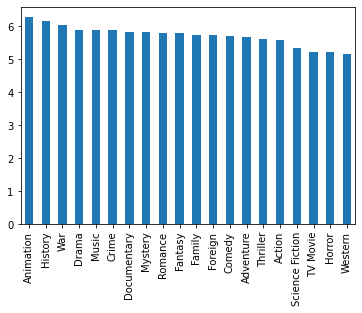

In [149]:
#Mean of each genres
#categories list
classes = pd.Series(all_genres).value_counts().index.to_list()
#generate mean of each genres
genres_mean_vote={}
for g in classes:
    g_mean = cleaned_data_2[contain_cat_ser(cleaned_data_2.genres,g)].vote_average.mean()
    genres_mean_vote[g]=g_mean

#visualize
pd.Series(genres_mean_vote).sort_values(ascending= False).plot(kind='bar')

#### <span style='color:Red'> TO DO  </span>
EDA of other list value with similar process

In [ ]:
...

### Example process of Basic one-hot Feature engineering (!!Need to be move later!!)

In [98]:
from sklearn.preprocessing import MultiLabelBinarizer

In [151]:
#generate one hot coding matrix
classes=genres_type.index.to_list()
#take top _15_ most popular genres
mlb = MultiLabelBinarizer(classes=classes[:15])
genres_one_hot=mlb.fit_transform(cleaned_data_2.genres)

#one-hot table
one_hot_genres_df=pd.DataFrame(data=genres_one_hot, columns = classes[:15])
# concatinated to the orginal table
example_one_hot_table=pd.concat([cleaned_data_2,one_hot_genres_df], axis=1 )
example_one_hot_table

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['History', 'Music', 'TV Movie', 'War', 'Western'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign
0,False,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,False,[],65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,False,[Grumpy Old Men Collection],0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,[],16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,[Father of the Bride Collection],0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,[],0,"[Drama, Family]",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45462,False,[],0,[Drama],111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45463,False,[],0,"[Action, Drama, Thriller]",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45464,False,[],0,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


↑

****

## Additional to 1. Split the dataset into US and other countries (preprocess production_countries column) -- Basic Analysis on generalizability of Dataset

In [66]:
# Look into number of NaN in production_countries
movies['production_countries'].isna().sum()
# Fill NaN with '[]'
movies['production_countries'] = movies['production_countries'].fillna('[]')
movies['production_countries'].isna().sum()

0

In [67]:
# Change '[...]' to a list
movies['production_countries'] = movies['production_countries'].apply(lambda x: literal_eval(x))

In [68]:
# Fix float type in the column
movies['production_countries'] = movies['production_countries'].apply(lambda x: '[]' if (type(x) == float) else x)
movies['production_countries'].apply(lambda x: len(x)).value_counts()

1     32151
0      6285
2      4878
3      1469
4       462
5       151
6        39
7        12
8         7
9         6
11        2
10        1
12        1
15        1
25        1
Name: production_countries, dtype: int64

In [69]:
# Change the column to be list of country names, 'Unknown' if list is empty. Count as not purely U.S.
def production_countries_helper(country_list):
    if len(country_list) == 0:
        return 'Unknown'
    try:
        name_list = [sub_dict['name'] for sub_dict in country_list]
    except:
        name_list = 'Unknown'
    finally:
        return name_list

movies['production_countries'] = movies['production_countries'].apply(production_countries_helper)

In [70]:
# Split the table into two sub-tables, one with only U.S. being the production_country, another with all other countries
# or including U.S. or Unknown
movies['only_produced_by_US'] = movies['production_countries'].apply(lambda x: (len(x) == 1) and (x[0] == 'United States of America'))
only_us = movies[movies['only_produced_by_US'] == True]
others = movies[movies['only_produced_by_US'] == False]
only_us.head(5)
others.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,only_produced_by_US
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,False
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://urldefense.proofpoint.com/v2/url?u=http-3A__www.mgm.com_view_movie_757_Goldeneye_&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=kVqO2MyyW1sST8vShDPrNRJK-t6-ezeLRFB8qsGnfgA&e=,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,False
11,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,...,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0,False
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,False
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,False


## Additional to 1: generalization EDA: Look at numerical data

### US Data

In [71]:
# Look into the numerical columns
us_num = only_us.select_dtypes(include=[np.number])
us_num

,revenue,runtime,vote_average,vote_count
0,373554033.0,81.0,7.7,5415.0
1,262797249.0,104.0,6.9,2413.0
2,0.0,101.0,6.5,92.0
3,81452156.0,127.0,6.1,34.0
4,76578911.0,106.0,5.7,173.0
...,...,...,...,...
45454,0.0,79.0,4.0,2.0
45456,0.0,65.0,6.3,8.0
45458,0.0,30.0,7.0,1.0
45459,0.0,85.0,3.5,1.0


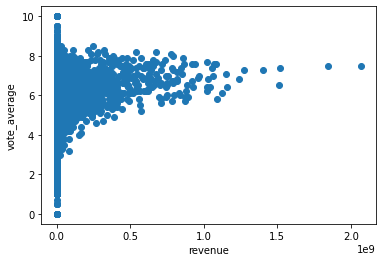

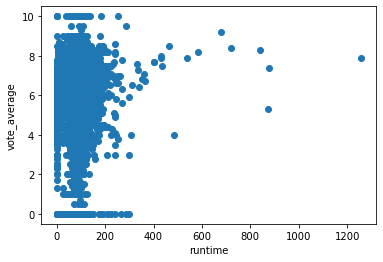

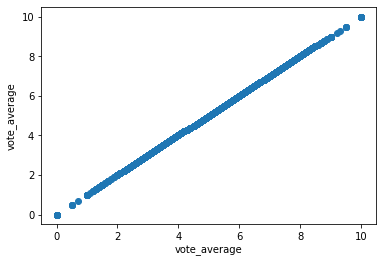

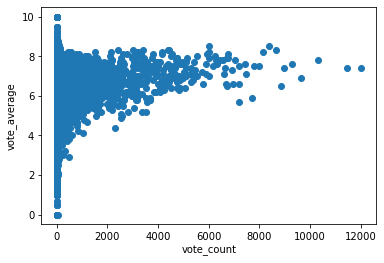

In [72]:
# Look at the relationship between average vote and other numerical columns
for col in us_num.columns:
    plt.scatter(x = us_num[col], y = us_num['vote_average'])
    plt.xlabel(col)
    plt.ylabel('vote_average')
    plt.show()

### Other country data

In [73]:
other_num = others.select_dtypes(include=[np.number])
other_num

,revenue,runtime,vote_average,vote_count
6,0.0,127.0,6.2,141.0
9,352194034.0,130.0,6.6,1194.0
11,0.0,88.0,5.7,210.0
14,10017322.0,119.0,5.7,137.0
15,116112375.0,178.0,7.8,1343.0
...,...,...,...,...
45460,0.0,104.0,5.7,26.0
45461,0.0,90.0,4.0,1.0
45462,0.0,360.0,9.0,3.0
45464,0.0,87.0,0.0,0.0


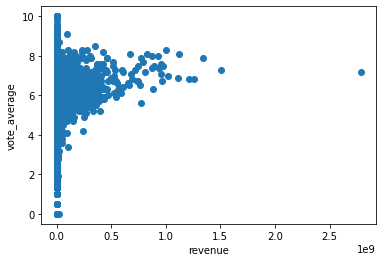

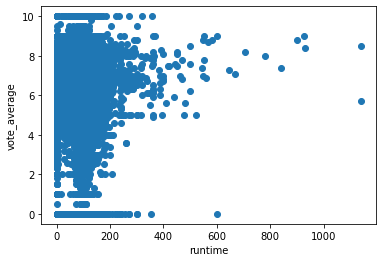

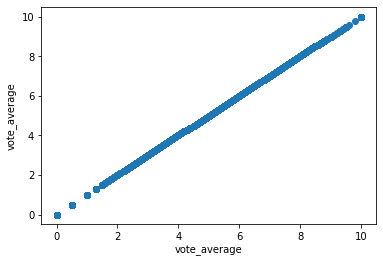

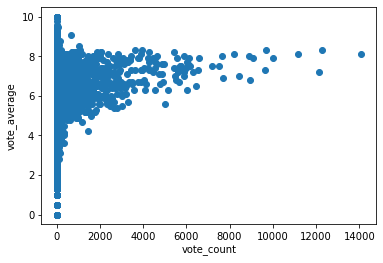

In [74]:
# Look at the relationship between average vote and other numerical columns
for col in other_num.columns:
    plt.scatter(x = other_num[col], y = other_num['vote_average'])
    plt.xlabel(col)
    plt.ylabel('vote_average')
    plt.show()

In [75]:
### Looks like runtime is not correlated with vote_average ### 

In [76]:
from scipy.stats import pearsonr

In [77]:
# Fillna for runtime to be mean
us_num['runtime'] = us_num['runtime'].fillna(us_num['runtime'].mean())

<ipython-input-77-10d05a7534ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=50iXFtUxa2qXWZ-j-iN1epChkWLs3x2yaE0dGUgxdc4&e=   us_num['runtime'] = us_num['runtime'].fillna(us_num['runtime'].mean())


In [78]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], us_num['runtime'])
corr

0.13176237727676715

In [79]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], np.log(us_num['runtime'] + 1))
corr

0.08577642425816162

In [167]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], us_num['revenue'])
corr

0.1242696645117434

In [168]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], np.log(us_num['revenue'] + 1))
corr

0.2048109571964256

In [82]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], np.log(us_num['vote_count'] + 1))
corr

0.42041835144261874

In [83]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], us_num['vote_count'])
corr

0.17022252680263006

In [84]:
# Imputation to fillna for vote_average and runtime
other_num['vote_average'] = other_num['vote_average'].fillna(other_num['vote_average'].mean())
other_num['runtime'] = other_num['runtime'].fillna(other_num['runtime'].mean())
other_num['revenue'] = other_num['revenue'].fillna(other_num['revenue'].mean())

<ipython-input-84-df00008b906a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=50iXFtUxa2qXWZ-j-iN1epChkWLs3x2yaE0dGUgxdc4&e=   other_num['vote_average'] = other_num['vote_average'].fillna(other_num['vote_average'].mean())
<ipython-input-84-df00008b906a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.ht

In [85]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(other_num['vote_average'], other_num['runtime'])
corr

0.16688486427452967

In [86]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(other_num['vote_average'], np.log(other_num['runtime'] + 1))
corr

0.15297949318067083

In [87]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(other_num['vote_average'], other_num['revenue'])
corr

0.06067560153034781

In [88]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(other_num['vote_average'], np.log(other_num['revenue'] + 1))
corr

0.11322871377968076

In [89]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], us_num['vote_count'])
corr

0.17022252680263006

In [90]:
# Calculate Pearson’s Correlation
corr, _ = pearsonr(us_num['vote_average'], np.log(us_num['vote_count'] + 1))
corr

0.42041835144261874

## 3a. Build baseline linear regression model on numerical data

### Transform revenue and vote_count to be the log, since the correlation increased

In [91]:
us_num['revenue_log'] = np.log(us_num['revenue'] + 1)
us_num['vote_count_log'] = np.log(us_num['vote_count'] + 1)
us_num

<ipython-input-91-12ae8264519b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=50iXFtUxa2qXWZ-j-iN1epChkWLs3x2yaE0dGUgxdc4&e=   us_num['revenue_log'] = np.log(us_num['revenue'] + 1)
<ipython-input-91-12ae8264519b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2D

,revenue,runtime,vote_average,vote_count,revenue_log,vote_count_log
0,373554033.0,81.0,7.7,5415.0,19.738573,8.597113
1,262797249.0,104.0,6.9,2413.0,19.386893,7.789040
2,0.0,101.0,6.5,92.0,0.000000,4.532599
3,81452156.0,127.0,6.1,34.0,18.215526,3.555348
4,76578911.0,106.0,5.7,173.0,18.153832,5.159055
...,...,...,...,...,...,...
45454,0.0,79.0,4.0,2.0,0.000000,1.098612
45456,0.0,65.0,6.3,8.0,0.000000,2.197225
45458,0.0,30.0,7.0,1.0,0.000000,0.693147
45459,0.0,85.0,3.5,1.0,0.000000,0.693147


In [92]:
other_num['revenue_log'] = np.log(other_num['revenue'] + 1)
other_num['vote_count'] = other_num['vote_count'].fillna(other_num['vote_count'].mean())
other_num['vote_count_log'] = np.log(other_num['vote_count'] + 1)
other_num

<ipython-input-92-a911397feda3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=d3DGHbVWTtx8LV9SxUMtQA&m=q0_zPokgGKp3yJ-dg_wNuaGpR-vpHW3ag10L7zDCLeUlVNSGZq1-Ue4tajotVmBQ&s=50iXFtUxa2qXWZ-j-iN1epChkWLs3x2yaE0dGUgxdc4&e=   other_num['revenue_log'] = np.log(other_num['revenue'] + 1)
<ipython-input-92-a911397feda3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-

,revenue,runtime,vote_average,vote_count,revenue_log,vote_count_log
6,0.0,127.0,6.2,141.0,0.000000,4.955827
9,352194034.0,130.0,6.6,1194.0,19.679693,7.085901
11,0.0,88.0,5.7,210.0,0.000000,5.351858
14,10017322.0,119.0,5.7,137.0,16.119826,4.927254
15,116112375.0,178.0,7.8,1343.0,18.570069,7.203406
...,...,...,...,...,...,...
45460,0.0,104.0,5.7,26.0,0.000000,3.295837
45461,0.0,90.0,4.0,1.0,0.000000,0.693147
45462,0.0,360.0,9.0,3.0,0.000000,1.386294
45464,0.0,87.0,0.0,0.0,0.000000,0.000000


### Look at US data

In [94]:
# Look at the RMSE of test set from US data
regr = linear_model.LinearRegression()
get_rmse(10, regr, ['vote_average', 'revenue', 'vote_count'])

[1.576966944003083, 1.5587725801466246, 1.5844275358790645, 1.5863599208942876, 1.5757216108557521, 1.5671836979887908, 1.5408577936236296, 1.5696065166010593, 1.5506929471219126, 1.5889184645458345]
1.569950801166004


### Look at non-US data

In [74]:
# Look at the RMSE of test set from other country data
regr = linear_model.LinearRegression()
get_rmse(10, regr, ['vote_average', 'revenue', 'vote_count'] , us_data = False)

[1.7679111298564314, 1.7718041052586495, 1.7705798775212147, 1.7605283473861286, 1.7483980693405639, 1.8281997526297789, 1.7962763987755428, 1.760492553341604, 1.792864527582842, 1.7830204018920857]
1.778007516358484


## 3b. Build baseline XGBRegressor model (numerical values only)

In [47]:
import xgboost as xgb

### Look at us_num data

In [75]:
xg_reg = xgb.XGBRegressor()
get_rmse(5, xg_reg, ['vote_average', 'revenue', 'vote_count'])

[1.1467055507380766, 1.160118545596386, 1.1935536382664367, 1.167869895623422, 1.1594254045956827]
1.165534606964001


### Look at other_num data

In [76]:
xg_reg = xgb.XGBRegressor()
get_rmse(5, xg_reg, ['vote_average', 'revenue', 'vote_count'], us_data = False)

[1.1861450818100387, 1.2280855648430886, 1.2202443815930666, 1.1948505643205134, 1.199771152860417]
1.205819349085425


## 3c. Build baseline Lightgbm model (numerical values only)

In [77]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.0 MB 18.8 MB/s eta 0:00:01     |████████████▋                   | 788 kB 18.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
import lightgbm as lgbm

### Look at us_num data

In [ ]:
# Use n_jobs = -1 to parallize the processing process
lgbmR = lgbm.LGBMRegressor(n_jobs = -1)
get_rmse(5, lgbmR, ['vote_average', 'revenue', 'vote_count'])

### Look at other_num data

In [ ]:
# Use n_jobs = -1 to parallize the processing process
lgbmR = lgbm.LGBMRegressor(n_jobs = -1)
get_rmse(5, lgbmR, ['vote_average', 'revenue', 'vote_count'], us_data = False)

## Build Baseline Random Forest regressor


In [59]:
from sklearn.ensemble import RandomForestRegressor


In [95]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
get_rmse(5, regr, ['vote_average', 'revenue', 'vote_count'], us_data = False)

[1.1916772823750603, 1.2162521716081267, 1.2259303871393767, 1.2118107012678767, 1.2265944306474055]
1.214452994607569


-----------------------------------------

# Below: Code from before

In [8]:
movies['belongs_to_collection'].isna().sum()

40972

In [71]:
(movies['vote_average'] == 0).sum()

2998

In [69]:
movies_small = movies[['budget', 'genres', 'production_companies', 'release_date', 'runtime','spoken_languages', 'revenue', 'vote_average']]

In [6]:
for col in movies.columns:
    print(movies[col].head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: adult, dtype: object
0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
9    {'id': 645, 'name': 'James Bond Collection', '...
Name: belongs_to_collection, dtype: object
0    30000000
1    65000000
2           0
3    16000000
4           0
5    60000000
6    58000000
7           0
8    35000000
9    58000000
Name: budget, dtype: object
0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 1

In [19]:
for genre in movies_small['genres'][0:20]:
    print(genre)

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name

In [30]:
all_genres = []
movies_small['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [39]:
re.findall("'name': '(.*?)'", movies_small['genres'][0])

['Animation', 'Comedy', 'Family']

In [43]:
genre_list_ser = movies_small['genres'].apply(lambda x: re.findall("'name': '(.*?)'", x))
genre_list_ser

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [44]:
all_genres = []
for genre_list in genre_list_ser:
    for genre in genre_list:
        if genre not in all_genres:
            all_genres.append(genre)

In [47]:
len(all_genres)

32

In [56]:
all_genres

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie',
 'Carousel Productions',
 'Vision View Entertainment',
 'Telescene Film Group Productions',
 'Aniplex',
 'GoHands',
 'BROSTA TV',
 'Mardock Scramble Production Committee',
 'Sentai Filmworks',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'The Cartel']

### Genres pre-processing with the mean or median of each genre scored; NaN filled with 0

In [98]:
movies_small_1 = movies_small.copy()
movies_small_1['genre_list'] = genre_list_ser
movies_small_1['vote_average'].mean()

5.618207215133889

In [99]:
bool_array = [('Animation' in g_list) for g_list in movies_small_1['genre_list']]
movies_small_1[bool_array]['vote_average'].mean()

6.275180972078594

In [106]:
genre_dict = {}
for genre in all_genres:
    bool_array = [(genre in g_list) for g_list in movies_small_1['genre_list']]
    genre_mean = np.round(movies_small_1[bool_array]['vote_average'].mean(),4)
    genre_dict[genre] = genre_mean
    

In [108]:
genre_dict
sorted_dict = {k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1])}
sorted_dict

{'Western': 5.1672,
 'Horror': 5.2304,
 'TV Movie': 5.2363,
 'Science Fiction': 5.3429,
 'Action': 5.5842,
 'Thriller': 5.6167,
 'Adventure': 5.6861,
 'Comedy': 5.7157,
 'Foreign': 5.738,
 'Family': 5.7534,
 'Fantasy': 5.7877,
 'Romance': 5.8027,
 'Mystery': 5.8205,
 'Documentary': 5.8231,
 'Crime': 5.8784,
 'Music': 5.8796,
 'Drama': 5.9052,
 'War': 6.0411,
 'History': 6.1542,
 'Animation': 6.2752,
 'Carousel Productions': nan,
 'Vision View Entertainment': nan,
 'Telescene Film Group Productions': nan,
 'Aniplex': nan,
 'GoHands': nan,
 'BROSTA TV': nan,
 'Mardock Scramble Production Committee': nan,
 'Sentai Filmworks': nan,
 'Odyssey Media': nan,
 'Pulser Productions': nan,
 'Rogue State': nan,
 'The Cartel': nan}

## Baseline with linear regression with only numerical features, fillna with -1; RMSE = 1.87

In [109]:
movies_small

,budget,genres,production_companies,release_date,runtime,spoken_languages,revenue,vote_average
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",373554033.0,7.7
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",262797249.0,6.9
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,6.5
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",81452156.0,6.1
4,0,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",76578911.0,5.7
...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",[],NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",0.0,4.0
45462,0,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",0.0,9.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,3.8
45464,0,[],"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,87.0,[],0.0,0.0


In [125]:
movie_baseline = movies[['budget', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_count', 'vote_average']]
# movie_baseline = movie_baseline.fillna(-1)

In [144]:
two_feature = movie_baseline[['release_date', 'vote_average']].dropna()
x = two_feature['release_date'].apply(lambda x: int(x.split('-')[0]))
x

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45460    1991
45462    2011
45463    2003
45464    1917
45465    2017
Name: release_date, Length: 45376, dtype: int64

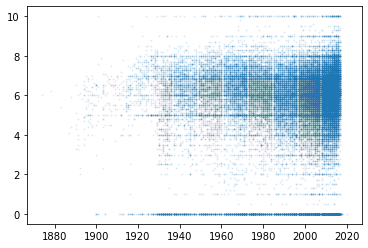

In [146]:
# Plot vote_average VS year
plt.scatter(x, two_feature['vote_average'], s = 1, alpha = 0.1)

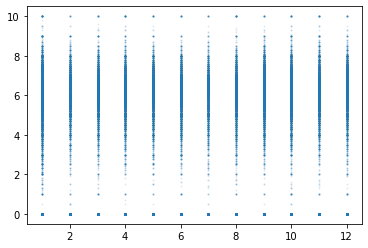

In [149]:
# Plot vote_average VS month
two_feature = movie_baseline[['release_date', 'vote_average']].dropna()
x = two_feature['release_date'].apply(lambda x: int(x.split('-')[1]))
plt.scatter(x, two_feature['vote_average'], s = 1, alpha = 0.1)

In [188]:
two_feature
two_feature['month'] = two_feature['release_date'].apply(lambda x: int(x.split('-')[1]))
two_feature['year'] = two_feature['release_date'].apply(lambda x: int(x.split('-')[0]))
by_year = two_feature.groupby('year').mean().reset_index()
two_feature

,release_date,vote_average,month,year
0,1995-10-30,7.7,10,1995
1,1995-12-15,6.9,12,1995
2,1995-12-22,6.5,12,1995
3,1995-12-22,6.1,12,1995
4,1995-02-10,5.7,2,1995
...,...,...,...,...
45460,1991-05-13,5.7,5,1991
45462,2011-11-17,9.0,11,2011
45463,2003-08-01,3.8,8,2003
45464,1917-10-21,0.0,10,1917


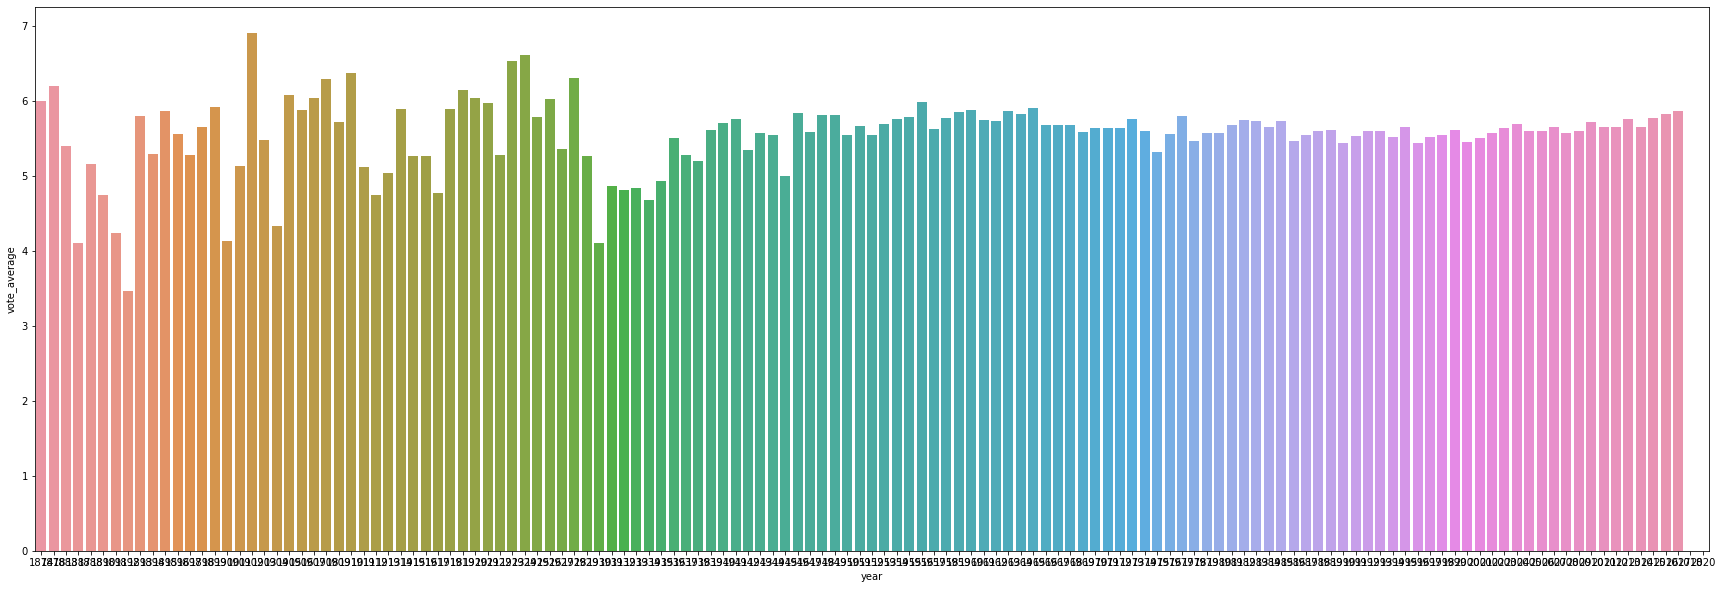

In [163]:
# Plot average vote_average VS year
plt.figure(figsize=(30,10))
sns.barplot(x='year', y='vote_average', data=by_year)
plt.show()

In [168]:
by_month = two_feature.groupby('month').mean().reset_index()
by_month

,month,vote_average,year
0,1,5.387601,1991.277740
1,2,5.610389,1992.468008
2,3,5.557951,1992.568252
3,4,5.595946,1993.040834
4,5,5.685804,1991.354298
5,6,5.616429,1991.525848
6,7,5.625341,1991.614394
7,8,5.644313,1991.862110
8,9,5.797892,1995.133526
9,10,5.647086,1993.458505


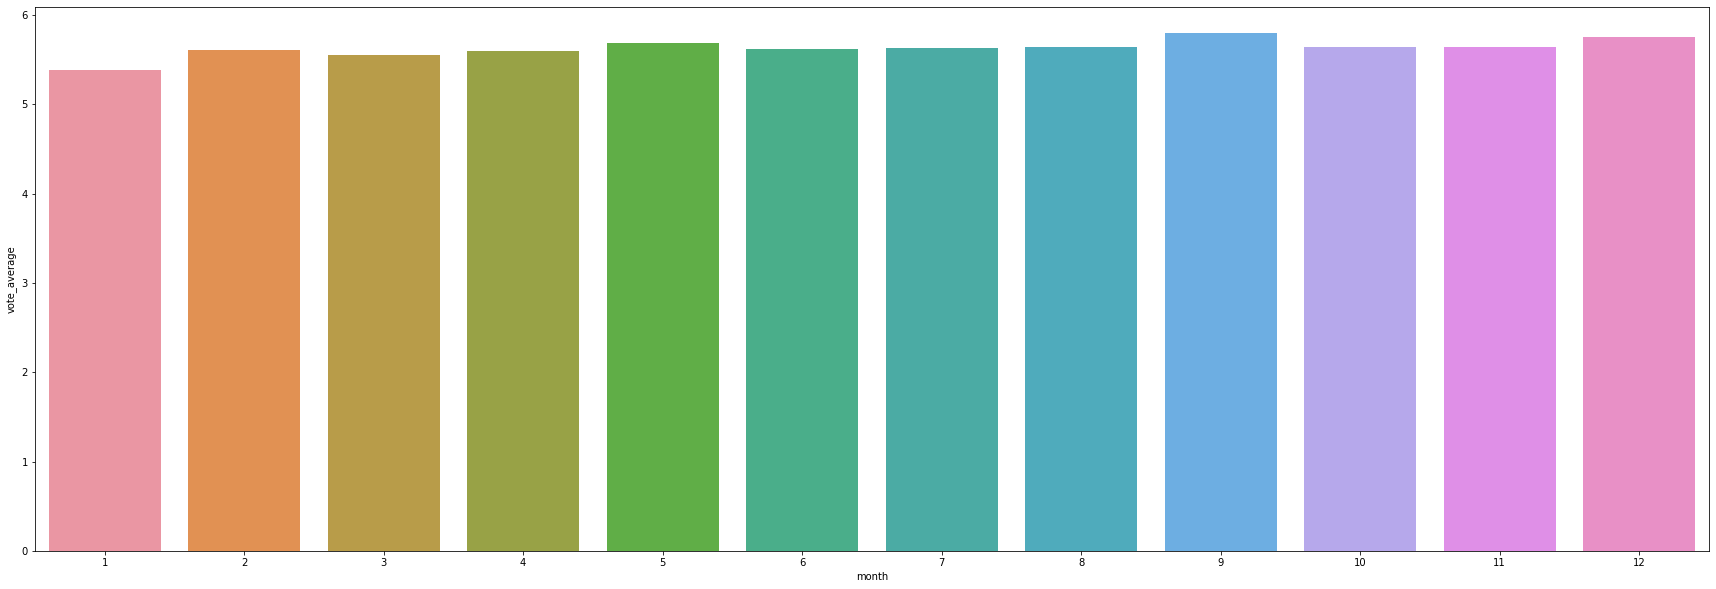

In [169]:
# Plot average vote_average VS month
plt.figure(figsize=(30,10))
sns.barplot(x='month', y='vote_average', data=by_month)
plt.show()

In [214]:
movie_baseline1 = movie_baseline.copy()
movie_baseline1 = movie_baseline1.dropna(subset=['release_date'])
movie_baseline1['year'] = movie_baseline1['release_date'].apply(lambda x: int(x.split('-')[0]))
movie_baseline1['month'] = two_feature['month']
movie_baseline1 = movie_baseline1.drop(columns = ['release_date'])
movie_baseline1 = movie_baseline1[movie_baseline1['budget'].apply(lambda x: 'jpg' not in x)]
movie_baseline1['budget'] = movie_baseline1['budget'].apply(lambda x : int(x))
movie_baseline1 = movie_baseline1.fillna(-1)

In [215]:
movie_baseline1

,budget,popularity,revenue,runtime,vote_count,vote_average,year,month
0,30000000,21.946943,373554033.0,81.0,5415.0,7.7,1995,10.0
1,65000000,17.015539,262797249.0,104.0,2413.0,6.9,1995,12.0
2,0,11.7129,0.0,101.0,92.0,6.5,1995,12.0
3,16000000,3.859495,81452156.0,127.0,34.0,6.1,1995,12.0
4,0,8.387519,76578911.0,106.0,173.0,5.7,1995,2.0
...,...,...,...,...,...,...,...,...
45460,0,5.683753,0.0,104.0,26.0,5.7,1991,5.0
45462,0,0.178241,0.0,360.0,3.0,9.0,2011,11.0
45463,0,0.903007,0.0,90.0,6.0,3.8,2003,8.0
45464,0,0.003503,0.0,87.0,0.0,0.0,1917,10.0


In [241]:
regr = linear_model.LinearRegression()
rmse_list = []
# Look at the RMSE of one try
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(movie_baseline1.drop(columns = ['vote_average']), 
                                                        movie_baseline1['vote_average'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse_list.append(rmse)

print(np.mean(rmse_list))

1.8773397082021372


In [228]:
movie_baseline2 = movie_baseline1.drop(columns = ['year', 'month'])
movie_baseline2

,budget,popularity,revenue,runtime,vote_count,vote_average
0,30000000,21.946943,373554033.0,81.0,5415.0,7.7
1,65000000,17.015539,262797249.0,104.0,2413.0,6.9
2,0,11.7129,0.0,101.0,92.0,6.5
3,16000000,3.859495,81452156.0,127.0,34.0,6.1
4,0,8.387519,76578911.0,106.0,173.0,5.7
...,...,...,...,...,...,...
45460,0,5.683753,0.0,104.0,26.0,5.7
45462,0,0.178241,0.0,360.0,3.0,9.0
45463,0,0.903007,0.0,90.0,6.0,3.8
45464,0,0.003503,0.0,87.0,0.0,0.0


In [239]:
rmse_list = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(movie_baseline2.drop(columns = ['vote_average']), 
                                                        movie_baseline2['vote_average'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_list.append(rmse)

print(np.mean(rmse_list))

1.874938082585457


In [233]:
movie_baseline3 = movie_baseline2.copy()
movie_baseline3 = movie_baseline3.drop(columns = ['budget'])
movie_baseline3

,popularity,revenue,runtime,vote_count,vote_average
0,21.946943,373554033.0,81.0,5415.0,7.7
1,17.015539,262797249.0,104.0,2413.0,6.9
2,11.7129,0.0,101.0,92.0,6.5
3,3.859495,81452156.0,127.0,34.0,6.1
4,8.387519,76578911.0,106.0,173.0,5.7
...,...,...,...,...,...
45460,5.683753,0.0,104.0,26.0,5.7
45462,0.178241,0.0,360.0,3.0,9.0
45463,0.903007,0.0,90.0,6.0,3.8
45464,0.003503,0.0,87.0,0.0,0.0


In [246]:
rmse_list = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(movie_baseline3.drop(columns = ['vote_average']), 
                                                        movie_baseline3['vote_average'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_list.append(rmse)

print(np.mean(rmse_list))

1.8659191770895265


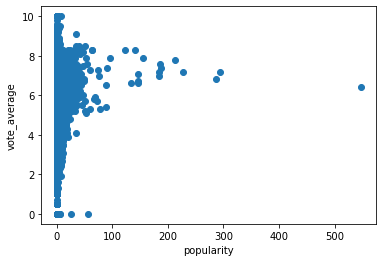

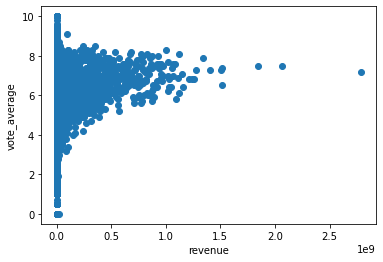

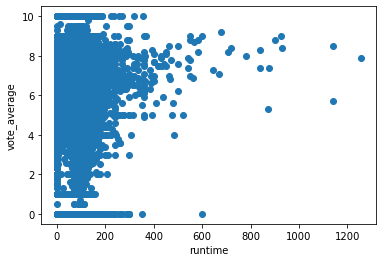

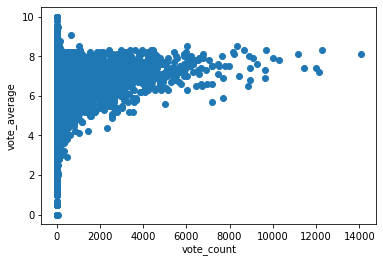

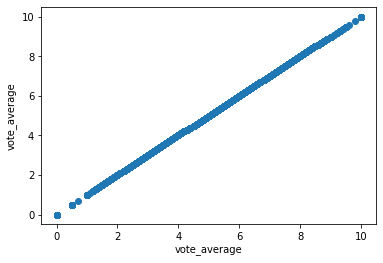

In [245]:
for col in movie_baseline3.columns:
    plt.scatter(x = movie_baseline3[col], y = movie_baseline3['vote_average'])
    plt.xlabel(col)
    plt.ylabel('vote_average')
    plt.show()

-------

## Only use log(vote_count) to predict vote_average, RMSE = 1.2

In [325]:
def inf_helper(x):
    if x == float('-inf'):
        return -100
    return x


movie_baseline4 = movie_baseline3[['vote_average', 'vote_count']]
movie_baseline4['vote_count'] = np.log(movie_baseline4['vote_count']).fillna(0).apply(inf_helper)


rmse_list = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(movie_baseline4.drop(columns = ['vote_average']), 
                                                        movie_baseline4['vote_average'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_list.append(rmse)

print(np.mean(rmse_list))

1.2330937348975484


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_110/3916308404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_user-5Fguide_indexing.html-23returning-2Da-2Dview-2Dversus-2Da-2Dcopy-255Cn&d=DwIGAw&c=-35OiAkTchMrZOngvJPOeA&r=ymEwp2G6i8DNuVfhIQgHiw&m=-s34UG32naOkFb7AEcHCFlw8hYmh-83CifSb8vdo2aUIiUOLYaJ722esqA_EGclU&s=8TLDb6C4JMDlUfPGjkEWDHSmKRvTy20wftaqlNdOs_Q&e=   movie_baseline4['vote_count'] = np.log(movie_baseline4['vote_count']).fillna(0).apply(inf_helper)


(0.0, 10.0)

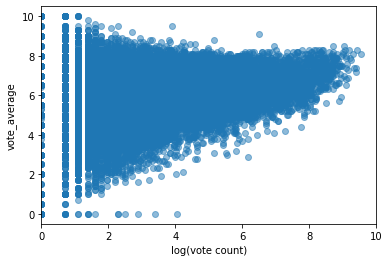

In [310]:
plt.scatter(x = movie_baseline4['vote_count'], y = movie_baseline4['vote_average'], alpha = 0.5)
plt.xlabel('log(vote count)')
plt.ylabel('vote_average')
plt.xlim(0, 10)

## Use log(vote_count) and log(revenue) to predict vote_average, RMSE = 1.2

In [321]:
movie_baseline5 = movie_baseline4.copy()
# Revenue: no Nan
movie_baseline5['revenue'] = movie_baseline2['revenue']
movie_baseline5['revenue'] = movie_baseline5['revenue'].apply(lambda x: np.log(x) if (x != 0) else x)
movie_baseline5

,vote_average,vote_count,revenue
0,7.7,8.596928,19.738573
1,6.9,7.788626,19.386893
2,6.5,4.521789,0.000000
3,6.1,3.526361,18.215526
4,5.7,5.153292,18.153832
...,...,...,...
45460,5.7,3.258097,0.000000
45462,9.0,1.098612,0.000000
45463,3.8,1.791759,0.000000
45464,0.0,-100.000000,0.000000


In [326]:
rmse_list = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(movie_baseline5.drop(columns = ['vote_average']), 
                                                        movie_baseline5['vote_average'], test_size=0.25)
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    rmse = mean_squared_error(y_test, predicted, squared=False)
    rmse_list.append(rmse)

print(np.mean(rmse_list))

1.2290704827568546


In [388]:
cleaned_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       45463 non-null  bool   
 1   budget                      45463 non-null  object 
 2   genres                      45463 non-null  object 
 3   original_language           45452 non-null  object 
 4   overview                    44509 non-null  object 
 5   popularity                  45463 non-null  object 
 6   production_companies        45463 non-null  object 
 7   production_countries        45463 non-null  object 
 8   release_date                45376 non-null  object 
 9   revenue                     45463 non-null  float64
 10  runtime                     45463 non-null  float64
 11  spoken_languages            45463 non-null  object 
 12  title                       45460 non-null  object 
 13  video                       454

<AxesSubplot:xlabel='production_companies_count', ylabel='vote_average'>

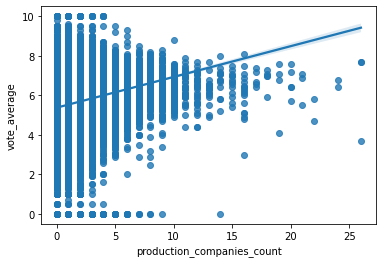

In [389]:
sns.regplot(data=cleaned_data_3, x='production_companies_count', y='vote_average')

In [445]:
#Only keep the OneHotEncode Column
df=cleaned_data_3
column='genres'
top_popular_class_num=20
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_genres=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_genres

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
45459,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45460,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [446]:
my_dict={}
for g in genres_types:
    values=cleaned_data_3[one_hot_df_genres[g]==1].vote_average.values
    my_dict[g]=np.nan_to_num(values)

In [447]:
np.mean(np.nan_to_num(my_dict['Drama']))

5.904929681717246

In [448]:
len(my_dict['Drama'])

20265

In [449]:
my_dict['Drama'].size
for key in my_dict.keys():
    print(key +  str(my_dict[key].mean()))

Drama5.904929681717246
Comedy5.715741162190866
Thriller5.615975865687303
Romance5.802657757980697
Action5.582474226804123
Horror5.229274555959768
Crime5.8784072440213615
Documentary5.823092573753814
Adventure5.6860697940503435
Science Fiction5.3393899639225975
Family5.753393501805054
Mystery5.82047020672882
Fantasy5.7877215737137915
Animation6.271937984496124
Foreign5.737977805178792
Music5.879599499374216
History6.154220314735336
War6.041118669690098
Western5.167178502879079
TV Movie5.229465449804432


Text(0.5, 1.0, 'Genres & distribution of IMDb average')

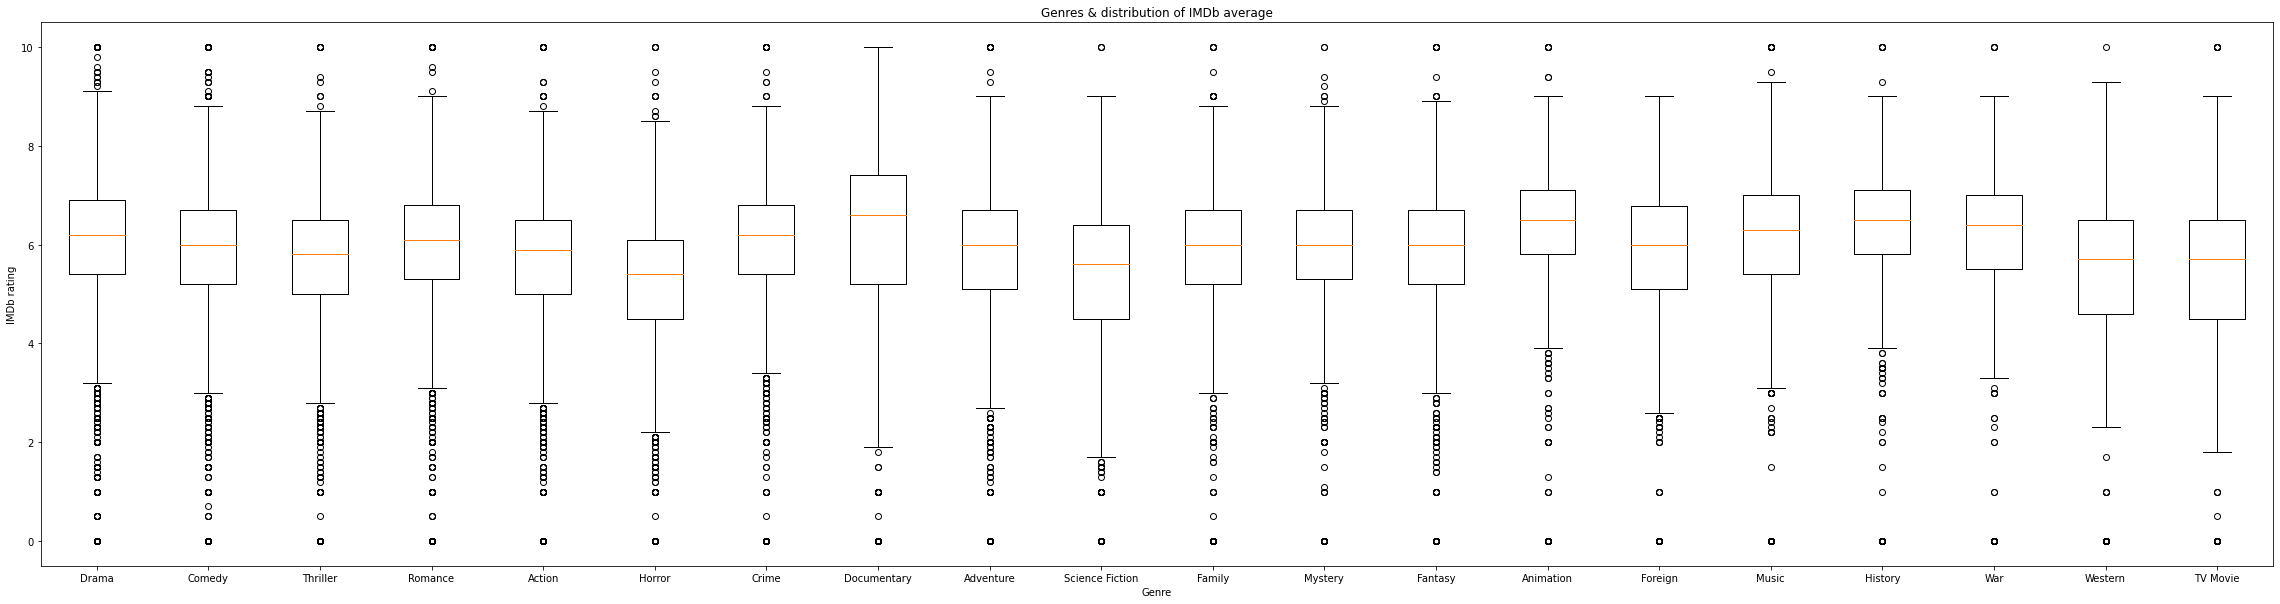

In [462]:
fig, ax=plt.subplots(figsize=(40,10))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('IMDb rating')
ax.set_xlabel('Genre')
ax.set_title('Genres & distribution of IMDb average')


In [433]:
cleaned_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   belongs_to_collection       45463 non-null  bool   
 1   budget                      45463 non-null  object 
 2   genres                      45463 non-null  object 
 3   original_language           45452 non-null  object 
 4   overview                    44509 non-null  object 
 5   popularity                  45463 non-null  object 
 6   production_companies        45463 non-null  object 
 7   production_countries        45463 non-null  object 
 8   release_date                45376 non-null  object 
 9   revenue                     45463 non-null  float64
 10  runtime                     45463 non-null  float64
 11  spoken_languages            45463 non-null  object 
 12  title                       45460 non-null  object 
 13  video                       454

In [437]:
production_companies_names_counts

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1076
Paramount Pictures                        1003
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
PicturePlay Films                            1
How follows what                             1
Wild Spark                                   1
Euclid 431 Pictures                          1
Yermoliev                                    1
Length: 23322, dtype: int64

In [454]:
warner_bros_movie=cleaned_data_3[cleaned_data_3.production_companies.apply(lambda x: 'Warner Bros.' in x)].reset_index()
mgm_movies=cleaned_data_3[cleaned_data_3.production_companies.apply(lambda x: 'Metro-Goldwyn-Mayer (MGM)' in x)].reset_index()

In [464]:
#Only keep the OneHotEncode Column
df=warner_bros_movie
column='genres'
top_popular_class_num=20
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_genres=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_genres

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1246,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1248,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Genres & distribution of IMDb average from mgm')

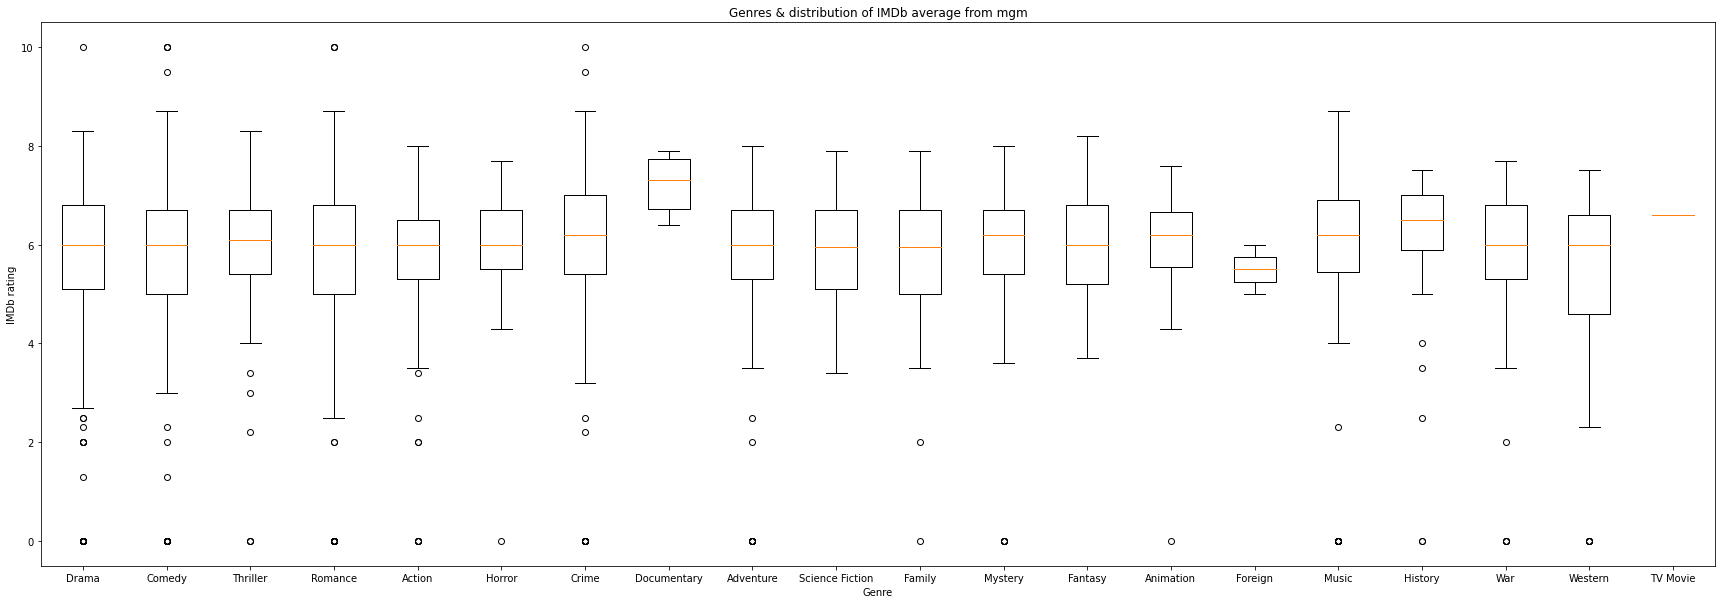

In [463]:
my_dict_3={}
for g in genres_types:
    values=mgm_movies[one_hot_df_genres[g]==1].vote_average.values
    my_dict_3[g]=np.nan_to_num(values)
    
fig, ax=plt.subplots(figsize=(30,10))
ax.boxplot(my_dict_3.values())
ax.set_xticklabels(my_dict_3.keys())
ax.set_ylabel('IMDb rating')
ax.set_xlabel('Genre')
ax.set_title('Genres & distribution of IMDb average from mgm')

Text(0.5, 1.0, 'Genres & distribution of IMDb average from Warner Bros')

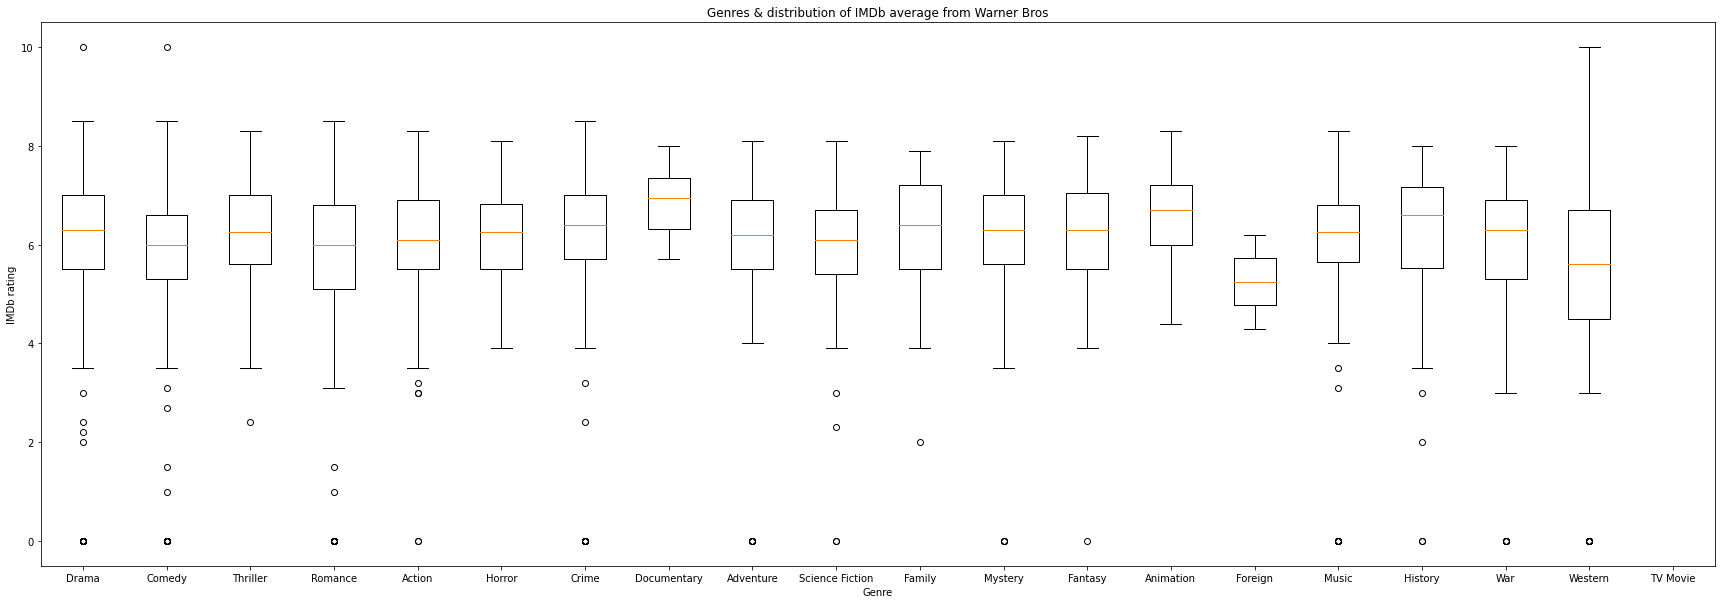

In [465]:
my_dict_2={}
for g in genres_types:
    values=warner_bros_movie[one_hot_df_genres[g]==1].vote_average.values
    my_dict_2[g]=np.nan_to_num(values)
    
fig, ax=plt.subplots(figsize=(30,10))
ax.boxplot(my_dict_2.values())
ax.set_xticklabels(my_dict_2.keys())
ax.set_ylabel('IMDb rating')
ax.set_xlabel('Genre')
ax.set_title('Genres & distribution of IMDb average from Warner Bros')